# Анализ лояльности пользователей Яндекс Афиши

- Автор: Кирилл Кональт
- Дата: 24.10.2025

### Цели и задачи проекта

Цель проекта:

1. Провести исследовательский анализ данных пользователей Яндекс Афиши,
2. Понять какие пользователи с большей вероятностью возвращаются на платформу.
3. Дать бизнесу рекомендации для работы с пользователями.

Для достижения этих целей необходимо выполнить следующие задачи:
1. Выгрузить данные и ознакомиться с ними.
2. Обработать данные: обработать пропуски и дубликаты, оптимизировать типы данных, привести данные к единому формату и т.д.
3. Создать профиль пользователя - посчитать агрегированные показатели по каждому пользователю Яндекс Афиши.
4. Исследовать группы пользователей с учетом получившихся агрегированных показателей.
5. Сформировать общие выводы и рекомендации.

### Описание данных

На текущем этапе достаточно сказать, что данные будут выгружены из базы данных `data-analyst-afisha`, которая содержит несколько таблиц.

Целевой набор данных, который будет создан на основе SQL-запроса, описан далее в разделе 1.1.

Поэтому представляется нецелесообразным приводить здесь описание всех таблиц и данных из них, т.к. значительная часть этих данных в датасет для работы не попадет.

### Содержимое проекта

- [1 Загрузка данных и их предобработка](#Загрузка-данных-и-их-предобработка)
    - [1.1 Задача - выгрузка SQL-запроса](#Задача---выгрузка-SQL-запроса)
    - [1.2 Задача - изучение данных](#Задача---изучение-данных)
- [2 Предобработка данных](#Предобработка-данных)
    - [2.1 Задача - конвертация валюты](#Задача---конвертация-валюты)
    - [2.2 Задача - проверка данных](#Задача---проверка-данных)
        - [2.2.1 Проверка данных](#Проверка-данных)
        - [2.2.2 Распределение данных в `tickets_count`](#Распределение-данных-в-`tickets_count`)
        - [2.2.3 Распределение данных в `days_since_prev`](#Распределение-данных-в-`days_since_prev`)
        - [2.2.4 Распределение данных в `revenue_rub`](#Распределение-данных-в-`revenue_rub`)
        - [2.2.5 Подсчет отфильтрованных строк](#Подсчет-отфильтрованных-строк)
        - [2.2.6 Анализ отрицательных значений в `revenue_rub`](#Анализ-отрицательных-значений-в-`revenue_rub`)
        - [2.2.7 Общие выводы](#Общие-выводы)
- [3 Создание профиля пользователя](#Создание-профиля-пользователя)
    - [3.1 Задача - профиль пользователя](#Задача---профиль-пользователя)
    - [3.2 Задача - доисследование данных](#Задача---доисследование-данных)
        - [3.2.1 Общие выводы (доисследование)](#Общие-выводы-(доисследование))
- [4 Исследовательский анализ данных](#Исследовательский-анализ-данных)
    - [4.1 Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя](#Исследуйте-признаки,-описывающие-первый-заказ-пользователя,-и-выясните,-влияют-ли-они-на-вероятность-возвращения-пользователя)
        - [4.1.1 Задача - распределение пользователей](#Задача---распределение-пользователей)
        - [4.1.2 Задача - повторные заказы](#Задача---повторные-заказы)
        - [4.1.3 Задача - продуктовые гипотезы](#Задача---продуктовые-гипотезы)
    - [4.2 Исследование поведения пользователей через показатели выручки и состава заказа](#Исследование-поведения-пользователей-через-показатели-выручки-и-состава-заказа)
        - [4.2.1 Задача - связь выручки и повторных заказов](#Задача---связь-выручки-и-повторных-заказов)
        - [4.2.2 Задача - сравнение распределения выручки](#Задача---сравнение-распределения-выручки)
        - [4.2.3 Задача - количество билетов и повторная покупка](#Задача---количество-билетов-и-повторная-покупка)
    - [4.3 Исследование временных характеристик первого заказа и их влияния на повторные покупки](#Исследование-временных-характеристик-первого-заказа-и-их-влияния-на-повторные-покупки)
        - [4.3.1 Задача - связь дня недели и поведения пользователей](#Задача---связь-дня-недели-и-поведения-пользователей)
        - [4.3.2 Задача - интервал между заказами и удержание клиентов](#Задача---интервал-между-заказами-и-удержание-клиентов)
        - [4.3.3 Задача - лайфтайм клиентов](#Задача---лайфтайм-клиентов)
    - [4.4 Корреляционный анализ количества покупок и признаков пользователя](#Корреляционный-анализ-количества-покупок-и-признаков-пользователя)
        - [4.4.1 Задача - корреляционный анализ числа заказов](#Задача---корреляционный-анализ-числа-заказов)
- [5 Общий вывод и рекомендации](#Общий-вывод-и-рекомендации)
    - [5.1  Информация об операциях с данными](#Информация-об-операциях-с-данными)
    - [5.2  Основные результаты анализа](#Основные-результаты-анализа)
    - [5.3  Рекомендации](#Рекомендации)
- [6 Финализация проекта и публикация в Git](#Финализация-проекта-и-публикация-в-Git)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
    
Здорово, что оставляешь вводную часть! Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.

Как правило, в вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
    
    
Отдельно хочу похвалить за интерактивное оглавление. Молодец    
</div>

## Загрузка данных и их предобработка

---
[Содержимое проекта](#Содержимое-проекта)

### **Задача - выгрузка SQL-запроса** 

Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


Добавим необходимые библиотеки в соответствии с инструкциями, описанными в сопроводительной информации к проекту.

Затем подключимся к базе данных и извлечем данные с помощью SQL-запроса, подготовленного ранее.

In [1]:
!pip install sqlalchemy 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install psycopg2-binary 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install phik


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# для работы с датафреймами понадобится pandas и функция create_engine()  
# из библиотеки SQLAlchemy для подключения к базе данных и выполнения SQL-запроса:
import pandas as pd
from sqlalchemy import create_engine 

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [5]:
# Сформируем строку для подключения
!pip install python-dotenv
import os
from dotenv import load_dotenv

load_dotenv()
    
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [7]:
# И создаем соединение
engine = create_engine(connection_string)

In [8]:
# Подготовленный ранее SQL-запрос запишем в переменную,
# которую затем добавим в соответствующий метод при создании датасета
query='''
SELECT p.user_id, 
    p.device_type_canonical, 
    p.order_id, 
    p.created_dt_msk AS order_dt, 
    p.created_ts_msk AS order_ts, 
    p.currency_code, 
    p.revenue, 
    p.tickets_count, 
    p.created_dt_msk::date - LAG(p.created_dt_msk::date) 
        OVER(PARTITION BY user_id ORDER BY created_dt_msk)
        AS days_since_prev,
		e.event_id,
		e.event_name_code AS event_name,
    e.event_type_main,
    p.service_name,
		r.region_name,
		c.city_name
FROM afisha.purchases AS p 
INNER JOIN afisha.events AS e USING (event_id)
LEFT JOIN afisha.city AS c USING (city_id)
LEFT JOIN afisha.regions AS r USING (region_id)
WHERE (p.device_type_canonical = 'desktop' OR
		p.device_type_canonical = 'mobile') AND
		e.event_type_main != 'фильм'
ORDER BY p.user_id
'''

In [9]:
# Наконец, создадим датасет для работы,
# записав результат выдачи SQL-запроса
df = pd.read_sql_query(query, con=engine) 

[Содержимое проекта](#Содержимое-проекта)

### Задача - изучение данных
---
[Содержимое проекта](#Содержимое-проекта)

 Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [10]:
# Выведем общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

На текущем этапе можно отметить следующее:

1. Датасет имеет `290 611` строк и `15` столбцов
2. Пропуски есть только в столбце `days_since_prev`, но это ожидаемый результат.
3. Тип данных `object` присвоен корректно, т.к. он закреплен за столбцами, содержащими строковые данные.
4. Для остальных столбцов, которым присвоены числовые типы данных, потребуется дополнительная проверка значений, чтобы решить в какой тип данных их лучше преобразовать.

In [11]:
# Отразим первые 10 строк датасета,
# чтобы получить более полное представление о данных
display(df.head(10))

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк
5,000898990054619,mobile,2613713,2024-10-23,2024-10-23 15:12:00,rub,902.74,3,19.0,500862,9cc55c15-4375-4129-9979-3129688ba1b4,концерты,Облачко,Лугоградская область,Кристалевск
6,00096d1f542ab2b,desktop,6636941,2024-08-15,2024-08-15 16:48:48,rub,917.83,4,NaN,201953,2f98d69f-4e60-4ffc-8f16-e539383526b1,театр,Край билетов,Каменевский регион,Глиногорск
7,000a55a418c128c,mobile,4657981,2024-09-29,2024-09-29 19:39:12,rub,47.78,1,NaN,265857,0d876e01-851e-458b-ba61-753e0e0c4063,театр,Лучшие билеты,Поленовский край,Дальнозолотск
8,000a55a418c128c,mobile,4657952,2024-10-15,2024-10-15 10:29:04,rub,74.84,2,16.0,271579,ddc795f8-7ef8-4eb0-b299-cb3e6ee24ba1,театр,Лучшие билеты,Поленовский край,Дальнозолотск
9,000cf0659a9f40f,mobile,6818191,2024-06-20,2024-06-20 10:51:10,rub,1421.91,4,NaN,516728,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерты,Лови билет!,Широковская область,Радужнополье


На текущем этапе можно заметить, что строковые данные представлены единообразно в рамках каждого столбца. Например, в столбцах `device_type_canonical` и `event_type_main` все видимые значения написаны со строчной буквы. 

Наоборот, названия сервисов по продаже билетов (`service_name`), регионов (`region_name`) и городов (`city_name`) записаны с прописной буквы, что представляется уместным для названий.

На следующих этапах проверим, нужно ли приводить запись данных в этих столбцах к единому формату и устранять дубликаты.

In [12]:
# Проверим статистические данные по столбцам с числовыми данными,
# чтобы понять, какой тип данных для них подойдет лучше
display(df[['order_id','revenue','tickets_count','event_id']].describe())

,order_id,revenue,tickets_count,event_id
count,2.906110e+05,290611.000000,290611.000000,290611.000000
mean,4.326225e+06,625.584360,2.754311,438019.834992
std,2.497551e+06,1227.693064,1.170620,147423.078841
min,1.000000e+00,-90.760000,1.000000,4436.000000
25%,2.163618e+06,116.850000,2.000000,361772.000000
50%,4.326366e+06,356.010000,3.000000,498275.000000
75%,6.488330e+06,810.130000,4.000000,546287.000000
max,8.653108e+06,81174.540000,57.000000,592325.000000


In [13]:
# Так как в столбце order_id данные отражаются некорректно,
# выгрузим показатели для него отдельными командами.
# Фактически нам нужны только максимальные и минимальные значения,
# чтобы понять подходящий диапазон типа данных int
display(df['order_id'].min())
display(df['order_id'].max())

np.int64(1)

np.int64(8653108)

In [14]:
# Наконец, отразим статистические показатели
# для столбца days_since_prev, т.к. этот столбец изначально отсутствовал в данных
# и был создан в результате SQL-запроса
df['days_since_prev'].describe()

count    268678.000000
mean          3.222381
std          11.350509
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64

Заметно, что столбец `days_since_prev` имеет явный перекос в данных - большинство наблюдений сгруппированы в диапазоне от `0` до `1`. Это указывает на то, что пользователи совершают заказы практически ежедневно.

Однако в это трудно поверить, т.к. это не вписывается в имеющееся представление (ожидание) о пользовательском поведении.

Поэтому в будущем может потребоваться дополнительный анализ этого столбца.

**Промежуточные выводы**

Итого, сейчас можно заключить, что:

1. Датасет имеет 290 611 строк и 15 столбцов
2. Пропуски есть только в столбце `days_since_prev`, но это ожидаемый результат. Подход к обработке пропусков будет определен далее.
3. Типы данных в целом присвоены корректно, но для числовых данных потребуется скорректировать размерность данных.
4. Столбец `days_since_prev` демонстрирует неравномерное распределение данных, которое можно истолковать двояко: либо пользователи почти каждый день совершают повторные заказы, либо в данных есть аномалия.

##  Предобработка данных

[Содержимое проекта](#Содержимое-проекта)

Выполните все стандартные действия по предобработке данных

### **Задача - конвертация валюты** 

[Содержимое проекта](#Содержимое-проекта)

Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

In [15]:
# Выгрузим указанный датасет и отразим информацию о нем
rate_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')
display(rate_df)

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt
...,...,...,...,...
352,2024-12-27,100,19.2705,kzt
353,2024-12-28,100,19.5105,kzt
354,2024-12-29,100,19.4860,kzt
355,2024-12-30,100,19.4860,kzt


In [16]:
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [17]:
# Проверим, какие значения кодов валют присутствуют в нашем рабочем датасете
df['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

Чтобы заменить данные о выручке в рабочем датасете, реализуем следующий план:

1. Объединим датасеты `df` и `rate_df`. Для этого приведем данные о дате в этих датасетах к одному формату даты и времени, т.к. этот столбец потребуется нам для объединения. При объединении датасетов будем использовать параметр `left`
2. В объединенном датасете создадим новый столбец `revenue_rub`. В строках с валютой тенге `kzt` используем данные о курсе и номинале валюты из `rate_df`.
3. Так как мы будем использовать параметр `left` для объединения, строки с выручкой в рублях будут иметь пропуски, которые затем перейдут в `revenue_rub`. Поэтому образовавшиеся пропуски заменим на значения рублевой выручки методом `fillna`.
4. В рабочем датасете `df` создадим новый столбец `revenue_rub`, которому присвоим значения одноименного столбца из объединенного датасета.

In [18]:
# Приводим данные к одному типу для последующего объединения
rate_df['data'] = pd.to_datetime(rate_df['data'])

# Объединяем датасеты по дате и валюте
# Использование двух столбцов позволит корректное соединить датасеты
merged = df.merge(rate_df, left_on=['order_dt', 'currency_code'], right_on=['data', 'cdx'], how='left')

# Создаём столбец revenue_rub
# При объединении у строк, где выручка в рублях, образовались пропуски, 
# которые можно заполнить значениями из оригинального столбца
merged['revenue_rub'] = (merged['revenue'] * merged['curs'] / merged['nominal']).round(2)
merged['revenue_rub'] = merged['revenue_rub'].fillna(merged['revenue'])

# создаем нужный столбец в основном датасете
df['revenue_rub'] = merged['revenue_rub']

# Проверяем результат
display(df[df['currency_code']=='kzt'])

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,revenue_rub
70,0033403583a55ed,mobile,7850214,2024-09-17,2024-09-17 16:52:06,kzt,518.10,4,20.0,559919,f5ec2467-ee48-42f3-89a0-a2d90d1d6fce,другое,Билеты без проблем,Верхоречная область,Серебрянка,98.50
89,0040e12d70fae81,desktop,8634925,2024-09-02,2024-09-02 19:49:14,kzt,347.18,3,39.0,559476,61ec7c0e-ea0c-4a3e-a63a-09cbe1bc6177,другое,Билеты без проблем,Верхоречная область,Серебрянка,65.73
96,0054b38b2653e6e,mobile,7625522,2024-09-09,2024-09-09 18:06:04,kzt,328.77,4,NaN,559582,524f434e-0381-4f47-9688-7c4e41961b65,другое,Билеты без проблем,Верхоречная область,Серебрянка,61.15
277,00f4f5244501ce6,mobile,720419,2024-06-11,2024-06-11 20:15:57,kzt,22021.55,5,NaN,536826,76af4f88-c554-4e9e-9df4-1cc8aeec8959,концерты,Мой билет,Верхоречная область,Серебрянка,4380.70
460,01370a0e9c1a7d5,mobile,2229811,2024-06-04,2024-06-04 13:19:47,kzt,7397.66,4,1.0,533803,0686ac7b-6f3e-4177-bb73-16b54acd1223,концерты,Мой билет,Шанырский регион,Широковка,1478.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290484,ffc24188a1d58f2,mobile,6862648,2024-07-11,2024-07-11 12:39:48,kzt,4735.52,2,20.0,538828,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерты,Билеты без проблем,Верхоречная область,Серебрянка,865.36
290485,ffc24188a1d58f2,mobile,6763294,2024-09-05,2024-09-05 12:07:00,kzt,4735.52,2,56.0,538828,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерты,Билеты без проблем,Верхоречная область,Серебрянка,872.36
290486,ffc24188a1d58f2,mobile,3984021,2024-09-06,2024-09-06 19:20:03,kzt,1849.41,1,1.0,533803,0686ac7b-6f3e-4177-bb73-16b54acd1223,концерты,Мой билет,Шанырский регион,Широковка,343.07
290488,ffc4133fbba20f4,mobile,8493869,2024-06-21,2024-06-21 14:04:34,kzt,3698.83,2,NaN,533803,0686ac7b-6f3e-4177-bb73-16b54acd1223,концерты,Мой билет,Шанырский регион,Широковка,687.21


In [19]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

None

Как видим, мы получили нужный столбец `revenue_rub`, который полностью заполнен необходимыми данными.

[Содержимое проекта](#Содержимое-проекта)

### **Задача - проверка данных**

[Содержимое проекта](#Содержимое-проекта)

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

#### Проверка данных

[Содержимое проекта](#Содержимое-проекта)

In [20]:
# Отразим общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [21]:
# Посчитаем абсолютное значение пропусков
df.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          21933
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
region_name                  0
city_name                    0
revenue_rub                  0
dtype: int64

In [22]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

user_id                  0.000000
device_type_canonical    0.000000
order_id                 0.000000
order_dt                 0.000000
order_ts                 0.000000
currency_code            0.000000
revenue                  0.000000
tickets_count            0.000000
days_since_prev          0.075472
event_id                 0.000000
event_name               0.000000
event_type_main          0.000000
service_name             0.000000
region_name              0.000000
city_name                0.000000
revenue_rub              0.000000
dtype: float64

**Выводы о пропусках в `days_since_prev`**

Как было указано в вводных данных к проекту, пропуски в этом столбце являются ожидаемым результатом - они указывают, что у пользователя нет повторных заказов.

В этой связи представляется целесообразным не обрабатывать эти пропуски, т.к. они сами по себе являются индикатором, который автоматически позволит далее применять необходимые группировки и расчеты. 

Теперь оптимизируем числовые данные в соответствии с ранее сделанными предположениями.

Зададим типы данных явным образом, указав допустимую размерность с учетом содержащихся в столбцах значений.

In [23]:
df['order_id'] = df['order_id'].astype('int32')
df['tickets_count'] = df['tickets_count'].astype('int8')
df['event_id'] = df['event_id'].astype('int32')
df['revenue'] = df['revenue'].astype('float32')
df['revenue_rub'] = df['revenue_rub'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int32         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float32       
 7   tickets_count          290611 non-null  int8          
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int32         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

**Промежуточные выводы**

По итогам оптимизации типов данных удалось сократить объем занимаемой памяти на ~6,5 мб.

Типы данных для столбцов `order_dt` и `order_ts` поменять не получится в силу использования библиотеки `Pandas`, поэтому перейдем к следующим шагам.

А именно к проверке данных на наличие явных и неявных дубликатов.

In [24]:
# Проверим какие уникальные значения имеются в столбце `device_type_canonical`
df['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

In [25]:
# Проверим какие уникальные значения имеются в столбце `event_type_main`
df['event_type_main'].unique()

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт',
       'ёлки'], dtype=object)

In [26]:
# Проверим какие уникальные значения имеются в столбце `service_name`
display(df['service_name'].sort_values(ascending=True).unique())

array(['Crazy ticket!', 'Show_ticket', 'Билет по телефону',
       'Билеты без проблем', 'Билеты в интернете', 'Билеты в руки',
       'Быстробилет', 'Быстрый кассир', 'Весь в билетах', 'Восьмёрка',
       'Вперёд!', 'Выступления.ру', 'Городской дом культуры',
       'Дом культуры', 'Дырокол', 'За билетом!', 'Зе Бест!', 'КарандашРУ',
       'Кино билет', 'Край билетов', 'Лимоны', 'Лови билет!',
       'Лучшие билеты', 'Мир касс', 'Мой билет', 'Облачко', 'Прачечная',
       'Радио ticket', 'Реестр', 'Росбилет', 'Тебе билет!', 'Телебилет',
       'Тех билет', 'Цвет и билет', 'Шоу начинается!', 'Яблоко'],
      dtype=object)

In [27]:
# Проверим какие уникальные значения имеются в столбце `region_name`
display(df['region_name'].sort_values(ascending=True).unique())

array(['Белоярская область', 'Берестовский округ', 'Берёзовская область',
       'Боровлянский край', 'Верховинская область', 'Верхозёрский край',
       'Верхоречная область', 'Ветренский регион', 'Вишнёвский край',
       'Глиногорская область', 'Голубевский округ',
       'Горицветская область', 'Горноземский регион',
       'Горностепной регион', 'Дальнеземская область',
       'Дальнезорский край', 'Дубравная область', 'Залесский край',
       'Заречная область', 'Зеленоградский округ', 'Златопольский округ',
       'Золотоключевской край', 'Зоринский регион', 'Каменевский регион',
       'Каменичская область', 'Каменноозёрный край', 'Каменноярский край',
       'Каменополянский округ', 'Ключеводский округ',
       'Кристаловская область', 'Кристальная область',
       'Крутоводская область', 'Крутоводский регион', 'Лесноярский край',
       'Лесодальний край', 'Лесополянская область', 'Лесостепной край',
       'Лесоярская область', 'Луговая область', 'Лугоградская область',
    

In [28]:
# Проверим какие уникальные значения имеются в столбце `city_name`
display(df['city_name'].sort_values(ascending=True).unique())

array(['Айкольск', 'Айсуак', 'Акбастау', 'Акбасты', 'Акжолтау',
       'Алтынкала', 'Алтынсай', 'Байкуль', 'Байсары', 'Байтерековск',
       'Беловодск', 'Белоярск', 'Бережанка', 'Бережанск', 'Березиногорск',
       'Березиноск', 'Березовцево', 'Берестовец', 'Берестяград',
       'Берёзиново', 'Берёзовка', 'Берёзогорск', 'Берёзодальн',
       'Берёзополье', 'Берёзореч', 'Берёзоречье', 'Бозарык', 'Боровлянск',
       'Буркиттау', 'Бурьяново', 'Верховино', 'Верховка', 'Верхозолотск',
       'Верхозорье', 'Верхоозёров', 'Ветеринск', 'Вишнёво',
       'Вишнёвогорск', 'Вишнёводск', 'Водниково', 'Глиногорск',
       'Глиногорь', 'Глиноград', 'Глинозолото', 'Глинозорь', 'Глинолес',
       'Глинополин', 'Глинополье', 'Глинополянск', 'Глинореч', 'Глинянск',
       'Голубевск', 'Голубино', 'Гореловск', 'Горицветск', 'Горноград',
       'Горнодолинск', 'Горнолесье', 'Горнолуг', 'Горнополец',
       'Горнополье', 'Горнополянск', 'Горнополяровск', 'Горнополёк',
       'Горноставинск', 'Горяново', '

**Промежуточные выводы**

По итогам изучения столбцов видно, что данные записаны в них корректно и не требуют нормализации.

Все имена собственные записаны с прописных букв, остальные слова - со строчной. Хотя может быть трудным отследить корректность записи данных в столбцах `region_name` и `city_name`, при упорядочивании названий в алфавитном порядке становится заметно, что дубликатов в данных нет. Похожие названия, очевидно, обусловлены стратегией присвоения алиасов реальным городам и регионам.

Перейдем к проверке строк на наличие дубликатов.

In [29]:
display(df.duplicated().sum())

np.int64(0)

Как видно, строки - полные дубликаты отсутствуют.

Попробуем отобрать строки по паре столбцов `user_id` - `order_id`

In [30]:
display(df[['user_id', 'order_id']].duplicated().sum())

np.int64(0)

Как видно, дубликатов по этим параметрам тоже нет. Можно предположить, что в таком случае абсолютно каждому заказу присваивается уникальный `id`.

Попробуем отобрать строки по другой паре столбцов: `user_id` - `order_ts`, т.к. одновременное оформление нескольких заказов одним и тем же пользователем может указывать на наличие неявных дубликатов.

In [31]:
display(df[['user_id', 'order_ts']].duplicated().sum())

np.int64(170)

Ознакомимся подробнее со строками, которые отмечены как дубликаты

In [32]:
# Отметим все повторяющиеся строки (параметр keep=False)
duplicates_mask = df.duplicated(subset=['user_id', 'order_ts'], keep=False)

# Выведем все строки, которые дублируются
duplicates_df = df[duplicates_mask]

display(duplicates_df)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,revenue_rub
4351,02ea4583333f064,mobile,1158638,2024-08-23,2024-08-23 22:46:05,rub,89.610001,3,0.0,540072,092b4a33-3898-4c17-b89c-6fbaa5dc9386,другое,Билеты в руки,Зеленоградский округ,Шаныртау,89.610001
4353,02ea4583333f064,mobile,1158696,2024-08-23,2024-08-23 22:46:05,rub,59.740002,2,0.0,540072,092b4a33-3898-4c17-b89c-6fbaa5dc9386,другое,Билеты в руки,Зеленоградский округ,Шаныртау,59.740002
5701,02ea4583333f064,mobile,1536363,2024-10-16,2024-10-16 17:49:44,rub,651.539978,2,0.0,425265,205b3fab-eac5-4b48-9afb-a1bc70f7db21,театр,Лови билет!,Североярская область,Озёрск,651.539978
5710,02ea4583333f064,mobile,5271215,2024-10-16,2024-10-16 17:49:44,rub,976.169983,2,0.0,534709,90501d29-a713-405c-a91d-4addc712d814,концерты,Лови билет!,Каменевский регион,Глиногорск,976.169983
6070,02ea4583333f064,mobile,4952505,2024-10-27,2024-10-27 16:39:40,rub,752.510010,2,0.0,188276,0714435e-3b5f-4312-aa36-c3a9d8853ef4,театр,Весь в билетах,Озернинский край,Родниковецк,752.510010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285388,fd4d47438ebb946,desktop,8547809,2024-06-19,2024-06-19 15:40:56,rub,989.570007,3,0.0,489843,25a26bf3-cb70-4f37-a7f0-c97cc065d414,театр,Билеты без проблем,Каменевский регион,Глиногорск,989.570007
285942,fd4d47438ebb946,mobile,6201361,2024-09-23,2024-09-23 16:26:42,rub,24.370001,1,0.0,560819,7231e1dc-ac86-40cc-83c6-20c9807e964d,театр,Мой билет,Широковская область,Луговаярово,24.370001
285943,fd4d47438ebb946,mobile,6201419,2024-09-23,2024-09-23 16:26:42,rub,48.730000,2,0.0,560819,7231e1dc-ac86-40cc-83c6-20c9807e964d,театр,Мой билет,Широковская область,Луговаярово,48.730000
289318,fe237d2cfd6e503,desktop,7566014,2024-10-31,2024-10-31 22:28:47,rub,41.830002,1,0.0,589624,c9eb1fa4-257b-4290-975a-7fe34b46d11b,концерты,Мой билет,Каменевский регион,Глиногорск,41.830002


Как видим, для некоторых пользователей действительно характерно наличие нескольких заказов, оформленных одновременно.

Тем не менее, можно заключить, что эти строки не являются дубликатами, т.к. полученные заказы оформлялись на разные мероприятия, в разные регионы и/или разные города. На прошлых этапах проекта отмечалось, что это является нормой, т.к. одно и то же событие могло проводиться в разных городах и на разных площадках.

Одновременное же оформление заказов может свидетельствовать об одновременной оплате этих заказов, находившихся в этот момент в корзине клиента.

**Промежуточные выводы**

По итогам изучения данных видно, что данные записаны в них корректно и не требуют нормализации. 

Явные или неявные дубликаты не обнаружены.

Теперь перейдем к проверке распределения численных данных и наличия в них выбросов. 

#### Распределение данных в `tickets_count`

[Содержимое проекта](#Содержимое-проекта)

In [33]:
# отразим статистические значения этого столбца
display(df['tickets_count'].describe())

count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

Явно видно, что все основные значения сгруппированы в пределах 1-4 билетов, но есть сильные выбросы.

Теперь для наглядности построим график гистограммы распределения значений в этом столбце.

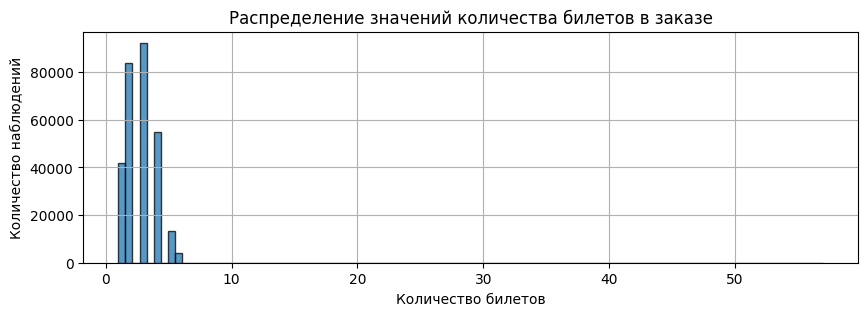

In [34]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим гистограмму распределения значений купленных билетов в одном заказе
df['tickets_count'].plot(
                kind='hist', 
                bins=100, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0,
)

# Настраиваем оформление графика
plt.title('Распределение значений количества билетов в заказе')
plt.xlabel('Количество билетов')
plt.ylabel('Количество наблюдений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Дополним визуализацию, построив "ящик с усами"

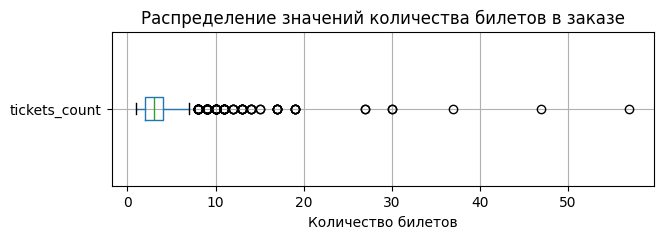

In [35]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений
df.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества билетов в заказе')
plt.xlabel('Количество билетов')

# Выводим график
plt.show()

Поскольку масштаб диаграммы размаха сильно искажается выбросами в данных, исключим их для большей наглядности:

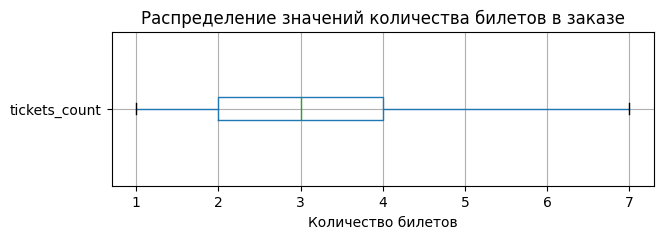

In [36]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений, скрыв выбросы
df.boxplot(column='tickets_count', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества билетов в заказе')
plt.xlabel('Количество билетов')

# Выводим график
plt.show()

Как видим, основная масса значений колеблется в диапазоне от 1 до 7 билетов в заказе.

С учетом условий задачи представляется уместным провести фильтрацию данных по 99 перцентилю, чтобы отсечь выбросы данных, которые могут исказить дальнейшие расчеты. 

Это также представляется оправданным в силу того, что наличие аномально высоких значений в рассматриваемом столбце может указывать на то, что за обычными пользователями скрывается коммерческая или иная организация. Исключение таких данных из дальнейших расчетов позволит сделать более обоснованные выводы о потребительском поведении.

In [37]:
# отфильтруем данные по 99 перцентилю и сформируем новый датасет для дальнейшей работы
df_filtered_tickets = df[df['tickets_count'] <= df['tickets_count'].quantile(0.99)]

Теперь повторно посмотрим на распределение данных в рассматриваемом столбце после фильтрации

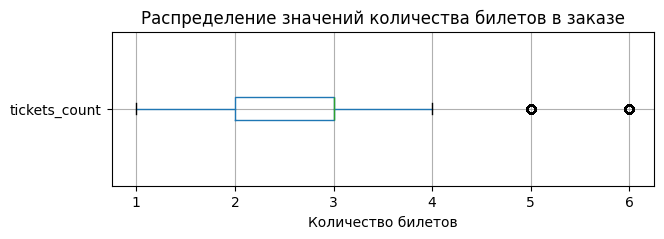

In [38]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений
df_filtered_tickets.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества билетов в заказе')
plt.xlabel('Количество билетов')

# Выводим график
plt.show()

**Промежуточные выводы**

По итогам изучения разброса в данных в столбце `tickets_count` обнаружены аномальные выбросы, которые сильно искажают общую картину распределения значений, а также могут негативно повлиять на корректность дальнейших расчетов.

С целью исключить такое влияние данные были отфильтрованы по 99 перцентилю. Подсчет отфильтрованных строк будет проведен на конечном этапе проверки данных.

#### Распределение данных в `days_since_prev`

[Содержимое проекта](#Содержимое-проекта)

In [39]:
# Отразим статистические значения для рассматриваемого столбца
display(df_filtered_tickets['days_since_prev'].describe())

count    268503.000000
mean          3.222079
std          11.349024
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64

Явно видно, что в этом столбце имеется еще более сильный выборос в данных. Практически все значения сгруппированы в диапазоне от `0` до `1`, но есть и аномальные значения. 

Теперь для наглядности построим график гистограммы распределения значений в этом столбце.

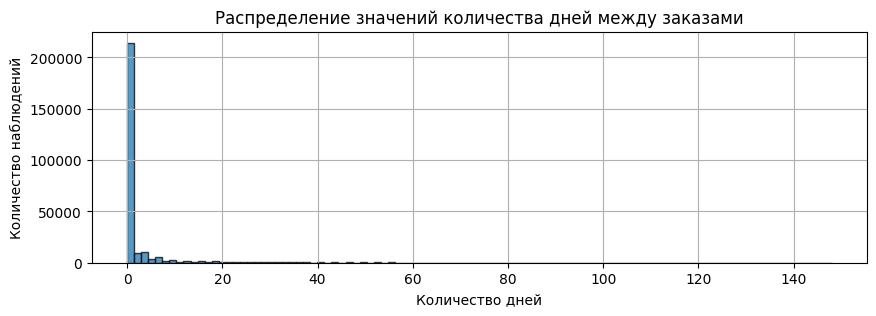

In [40]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим гистограмму распределения значений
df_filtered_tickets['days_since_prev'].plot(
                kind='hist', 
                bins=100, # Устанавливаем количество корзин - всего 100
                alpha=0.75,
                edgecolor='black',
                rot=0,
)

# Настраиваем оформление графика
plt.title('Распределение значений количества дней между заказами')
plt.xlabel('Количество дней')
plt.ylabel('Количество наблюдений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Дополним визуализацию, построив "ящик с усами"

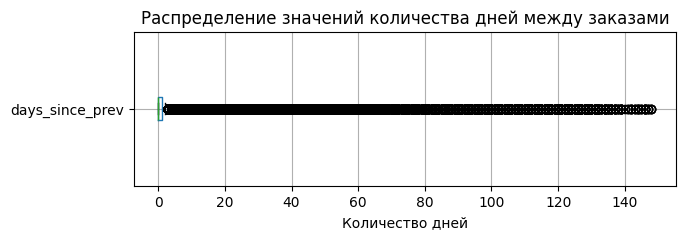

In [41]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений
df_filtered_tickets.boxplot(column='days_since_prev', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества дней между заказами')
plt.xlabel('Количество дней')

# Выводим график
plt.show()

Поскольку масштаб диаграммы размаха сильно искажается выбросами в данных, исключим их для большей наглядности:

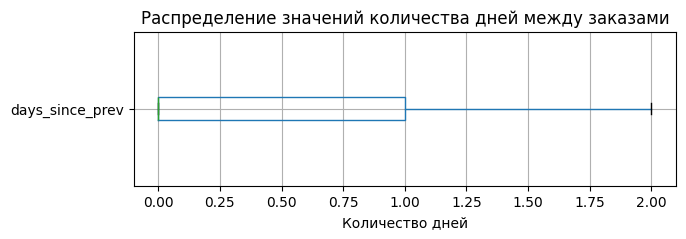

In [42]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений, скрыв выбросы
df_filtered_tickets.boxplot(column='days_since_prev', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества дней между заказами')
plt.xlabel('Количество дней')

# Выводим график
plt.show()

Как видим, основная масса значений колеблется в диапазоне от 0 до 2 дней между заказами.

С учетом условий задачи представляется уместным провести фильтрацию данных по 99 перцентилю, чтобы отсечь выбросы данных, которые могут исказить дальнейшие расчеты.

In [43]:
# Отфильтруем данные и создадим датасет для дальнейшей работы
df_filtered_days = df_filtered_tickets[
    df_filtered_tickets['days_since_prev'] 
    <= df_filtered_tickets['days_since_prev'].quantile(0.99)]

Теперь повторно посмотрим на распределение данных в рассматриваемом столбце после фильтрации:

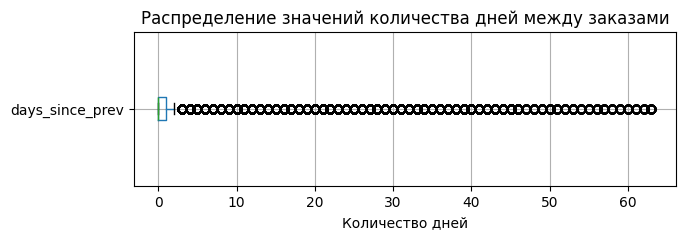

In [44]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений, скрыв выбросы
df_filtered_days.boxplot(column='days_since_prev', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества дней между заказами')
plt.xlabel('Количество дней')

# Выводим график
plt.show()

**Промежуточные выводы**

По итогам изучения разброса в данных в столбце `days_since_prev` обнаружены выбросы, которые сильно искажают общую картину распределения значений, а также могут негативно повлиять на корректность дальнейших расчетов.

С целью исключить такое влияние данные были отфильтрованы по 99 перцентилю. Подсчет отфильтрованных строк будет проведен на конечном этапе проверки данных.

#### Распределение данных в `revenue_rub`

[Содержимое проекта](#Содержимое-проекта)

In [45]:
# Отразим статистические показатели для рассматриваемого столбца
display(df_filtered_days['revenue_rub'].describe())

count    265862.000000
mean        553.094055
std         894.984802
min         -90.760002
25%         111.559998
50%         345.809998
75%         798.140015
max       81174.539062
Name: revenue_rub, dtype: float64

На текущем этапе заметны две аномалии: отрицательное значение выручки и максимальное значение, на два порядка превышающее среднее значение или значение стандартного отклонения.

Проанализируем их на дальнейших этапах.

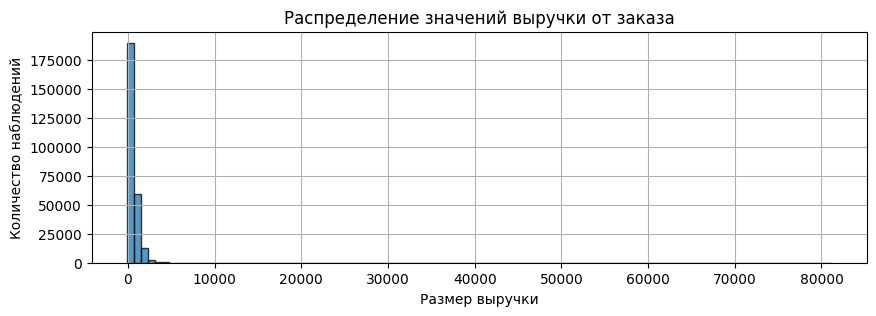

In [46]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим гистограмму распределения значений
df_filtered_days['revenue_rub'].plot(
                kind='hist', 
                bins=100, # Устанавливаем количество корзин - всего 100
                alpha=0.75,
                edgecolor='black',
                rot=0
)

# Настраиваем оформление графика
plt.title('Распределение значений выручки от заказа')
plt.xlabel('Размер выручки')
plt.ylabel('Количество наблюдений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Дополним визуализацию, построив "ящик с усами"

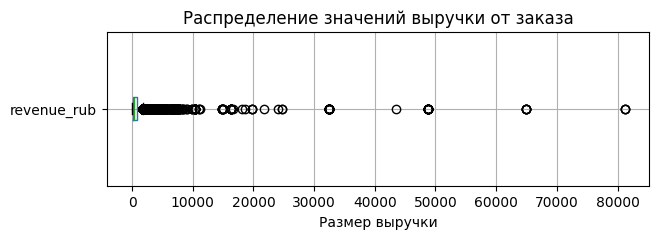

In [47]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений в столбце
df_filtered_days.boxplot(column='revenue_rub', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений выручки от заказа')
plt.xlabel('Размер выручки')

# Выводим график
plt.show()

Поскольку масштаб диаграммы размаха сильно искажается выбросами в данных, исключим их для большей наглядности:

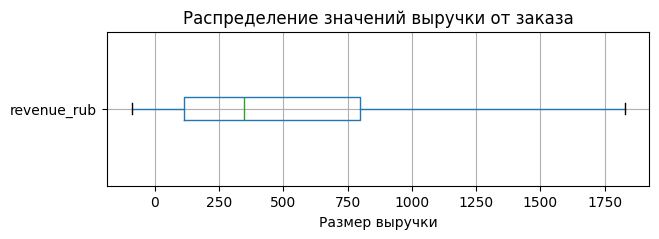

In [48]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений в столбце seats
df_filtered_days.boxplot(column='revenue_rub', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений выручки от заказа')
plt.xlabel('Размер выручки')

# Выводим график
plt.show()

Как видим, основная масса значений колеблется в диапазоне до 1800 рублей выручки за заказ.

С учетом условий задачи представляется уместным провести фильтрацию данных по 99 перцентилю, чтобы отсечь выбросы данных, которые могут исказить дальнейшие расчеты. 

Это также представляется оправданным в силу того, что наличие аномально высоких значений в рассматриваемом столбце может указывать на то, что за обычными пользователями скрывается коммерческая или иная организация. Исключение таких данных из дальнейших расчетов позволит сделать более обоснованные выводы о потребительском поведении.

In [49]:
# Отфильтруем данные и создадим датасет для дальнейшей работы
df_filtered_revenue = df_filtered_days[
    df_filtered_days['revenue'] 
    <= df_filtered_days['revenue'].quantile(0.99)]

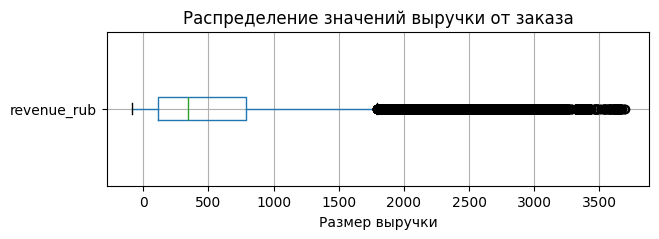

In [50]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений в столбце
df_filtered_revenue.boxplot(column='revenue_rub', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений выручки от заказа')
plt.xlabel('Размер выручки')

# Выводим график
plt.show()

**Промежуточные выводы**

По итогам изучения разброса в данных в столбце `revenue_rub` обнаружены аномальные выбросы, которые сильно искажают общую картину распределения значений, а также могут негативно повлиять на корректность дальнейших расчетов.

С целью исключить такое влияние данные были отфильтрованы по 99 перцентилю. Подсчет отфильтрованных строк будет проведен на конечном этапе проверки данных.

#### Подсчет отфильтрованных строк

[Содержимое проекта](#Содержимое-проекта)

In [51]:
# отразим общую информацию об отфильтрованном датасете
df_filtered_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263283 entries, 5 to 290608
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                263283 non-null  object        
 1   device_type_canonical  263283 non-null  object        
 2   order_id               263283 non-null  int32         
 3   order_dt               263283 non-null  datetime64[ns]
 4   order_ts               263283 non-null  datetime64[ns]
 5   currency_code          263283 non-null  object        
 6   revenue                263283 non-null  float32       
 7   tickets_count          263283 non-null  int8          
 8   days_since_prev        263283 non-null  float64       
 9   event_id               263283 non-null  int32         
 10  event_name             263283 non-null  object        
 11  event_type_main        263283 non-null  object        
 12  service_name           263283 non-null  object   

In [52]:
# Теперь посчитаем абсолютное и относительное значение отфильтрованных строк
diff = df.shape[0] - df_filtered_revenue.shape[0]
diff_share = round((df.shape[0] - df_filtered_revenue.shape[0]) / df.shape[0], 2)
print(diff)
print(diff_share)

27328
0.09


**Промежуточные выводы**

Итого, удалено `27 328` строк или `9%` от их общего количества.

Такая фильтрация представляется уместной, т.к. она позволила исключить аномально высокие числовые значения, которые сильно искажали статистические показатели в каждом из рассмотренных столбцов. В каждом случае фильтрация проводилась по 99-перцентилю. 

#### Анализ отрицательных значений в `revenue_rub`

[Содержимое проекта](#Содержимое-проекта)

Ранее было обнаружено, что указанный столбец содержит отрицательные значения выручки, хоть и небольшие.

Ознакомимся с ними, чтобы определить как поступить с этими данными.

In [53]:
# отфильтруем значения и отразим их
display(df_filtered_revenue[df_filtered_days['revenue_rub']< 0])

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\4275214368.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_filtered_revenue[df_filtered_days['revenue_rub']< 0])


,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,revenue_rub
4522,02ea4583333f064,mobile,2360920,2024-09-03,2024-09-03 18:12:58,rub,-0.23,3,0.0,559772,592856bb-09a5-4d32-9534-0e02c6056e44,другое,Билеты без проблем,Широковская область,Лесореченск,-0.23
4549,02ea4583333f064,mobile,2361094,2024-09-04,2024-09-04 09:34:53,rub,-0.15,2,0.0,559772,592856bb-09a5-4d32-9534-0e02c6056e44,другое,Билеты без проблем,Широковская область,Лесореченск,-0.15
8133,043f669c9f734b1,mobile,166809,2024-09-27,2024-09-27 10:56:35,rub,-0.62,1,1.0,567183,9f571dad-b18a-4095-ac76-9db60d8dd97a,другое,Лучшие билеты,Золотоключевской край,Луговинец,-0.62
8134,043f669c9f734b1,mobile,166780,2024-09-27,2024-09-27 10:00:09,rub,-1.86,3,0.0,567183,9f571dad-b18a-4095-ac76-9db60d8dd97a,другое,Лучшие билеты,Золотоключевской край,Луговинец,-1.86
11342,06727636bf2f465,mobile,6620527,2024-06-30,2024-06-30 05:40:34,rub,-1.58,2,24.0,538650,ffe03bc6-0e0c-480d-b037-6a4b55540ab5,другое,Билеты без проблем,Берёзовская область,Златопольск,-1.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288855,fe237d2cfd6e503,mobile,3700575,2024-10-12,2024-10-12 08:11:33,rub,-5.70,1,0.0,247058,a3214473-934e-44ad-a8da-82915f51583f,концерты,Тебе билет!,Речицкая область,Радужанов,-5.70
288903,fe237d2cfd6e503,desktop,3523646,2024-10-15,2024-10-15 20:32:18,rub,-1.43,3,0.0,243963,80f5f95b-9a58-401d-b888-4261335ae290,другое,Лучшие билеты,Ягодиновская область,Речинцево,-1.43
288904,fe237d2cfd6e503,desktop,3523617,2024-10-15,2024-10-15 20:13:13,rub,-0.96,2,0.0,243963,80f5f95b-9a58-401d-b888-4261335ae290,другое,Лучшие билеты,Ягодиновская область,Речинцево,-0.96
289052,fe237d2cfd6e503,mobile,5445853,2024-10-21,2024-10-21 20:22:29,rub,-0.61,1,0.0,243393,1f30acba-8b62-41c3-aaea-a80bf58d0d26,другое,Лучшие билеты,Ягодиновская область,Речинцево,-0.61


In [54]:
# Попробуем посмотреть на распределение заказов в зависимости от категорий мероприятий
df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('event_type_main')['order_id'].count().sort_values(ascending=False)

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\4069544082.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('event_type_main')['order_id'].count().sort_values(ascending=False)


event_type_main
другое      280
выставки     41
спорт        22
концерты      1
Name: order_id, dtype: int64

In [55]:
df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('device_type_canonical')['order_id'].count().sort_values(ascending=False)

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\583678823.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('device_type_canonical')['order_id'].count().sort_values(ascending=False)


device_type_canonical
mobile     321
desktop     23
Name: order_id, dtype: int64

In [56]:
df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('currency_code')['order_id'].count().sort_values(ascending=False)

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\3425462392.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('currency_code')['order_id'].count().sort_values(ascending=False)


currency_code
rub    344
Name: order_id, dtype: int64

In [57]:
# Попробуем посмотреть на распределение заказов в зависимости от конкретного билетного оператора
df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('service_name')['order_id'].count()

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\775470792.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('service_name')['order_id'].count()


service_name
Билеты без проблем    196
Билеты в руки          88
Лови билет!            35
Лучшие билеты          24
Тебе билет!             1
Name: order_id, dtype: int64

In [58]:
# Попробуем посмотреть на распределение заказов в зависимости от региона
df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('region_name')['order_id'].count().sort_values(ascending=False)

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\3769098171.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered_revenue[df_filtered_days['revenue_rub']< 0].groupby('region_name')['order_id'].count().sort_values(ascending=False)


region_name
Берёзовская область          97
Широковская область          67
Солнечноземская область      38
Малиновая область            33
Зоринский регион             17
Светополянский округ         15
Североярская область         14
Дальнеземская область        13
Ягодиновская область         11
Речицкий регион               8
Серебряноярский округ         7
Лугоградская область          7
Золотоключевской край         5
Чистогорская область          3
Яблоневская область           3
Солнечнореченская область     2
Речиновская область           1
Речицкая область              1
Кристаловская область         1
Медовская область             1
Name: order_id, dtype: int64

**Промежуточные выводы**

Как видно, отрицательные значения выручки имеют некоторые закономерности распределения: они характерны для определенных регионов, билетных операторов и типов мероприятий. При этом заметно, что все они присущи для заказов, совершенных в сентябре и октябре 2024 года. Также все отрицательные значения получены для рублевых заказов, что указывает на совершение этих заказов только на территории РФ.

Однако незначительное количество таких значений, а равно как и их абсолютная величина (минимум -90 рублей) позволяют эти значения никак не обрабатывать, т.к. они не оказывают значительного влияния на дальнейшие исследования.

С учетом полученных наблюдений можно предположить, что такие значения выручки могут являться следствием сезонных распродаж, скидок, использования промокодов или иными действиями самого сервиса (Яндекс Афиши).

#### Общие выводы

[Содержимое проекта](#Содержимое-проекта)

1. По итогам предобработки данных в рабочем датасете `df` создан дополнительный столбец `revenue_rub`, в котором все значения выручки приведены к одной валюте - рублям РФ.
2. В столбце `days_since_prev` имеются пропуски, но это ожидаемый результат выполнения SQL-запроса. Эти пропуски указывают на пользователей, у которых нет повторных заказов. Принято решение эти пропуски не обрабатывать, так как они сами по себе являются индикатором, который автоматически позволит далее применять необходимые группировки и расчеты.
3. Были оптимизированы типы данных в столбцах `order_id`,`tickets_count`,`event_id`,`revenue` и `revenue_rub` - в этих столбцах оптимизирована размерность данных. В иных столбцах типы данных не преобразовывались.
4. По итогам изучения строковых данных установлено, что все данные записаны корректно, не имеют дубликатов и не требуют нормализации.
5. По итогам поиска явным и неявных строк - дубликатов установлено, что имеются строки, где один и тот же пользователь совершил несколько заказов в одно и то же время. Тем не менее, можно заключить, что эти строки не являются дубликатами, т.к. полученные заказы оформлялись на разные мероприятия, в разные регионы и/или разные города. На прошлых этапах проекта отмечалось, что это является нормой, т.к. одно и то же событие могло проводиться в разных городах и на разных площадках. Одновременное же оформление заказов может свидетельствовать об одновременной оплате этих заказов, находившихся в этот момент в корзине клиента.
6. При изучении распределения числовых значений в столбцах `tickets_count`, `days_since_prev` и `revenue_rub` были выявлены аномальные значения (выбросы), которые сильно искажают статистические показатели данных в этих столбцах. По итогу изучения было решено отфильтровать данные по 99 перцентилю, чтобы исключить влияние выбросов на дальнейшие расчеты. Фильтрация последовательно выполнена по трем указанным столбцам.
7. По итогам фильтрации получен датасет, из которого удалено `27 328` строк или `9%` от их исходного количества.
8. В столбце `revenue_rub` также обнаружены отрицательные значения выручки (минимальное значение `-90.76 руб.`). они характерны для определенных регионов, билетных операторов и типов мероприятий. При этом заметно, что все они присущи для заказов, совершенных в сентябре и октябре 2024 года. Также все отрицательные значения получены для рублевых заказов, что указывает на совершение этих заказов только на территории РФ.
9. Однако незначительное количество отрицательных значений в столбце `revenue_rub`, а равно как и их абсолютная величина позволяют эти значения никак не обрабатывать, т.к. они не оказывают значительного влияния на дальнейшие исследования.
10. Итого в отфильтрованном датасете имеется `263 283` строк и `16` столбцов.

## Создание профиля пользователя

[Содержимое проекта](#Содержимое-проекта)

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---


---


### **Задача - профиль пользователя** 

[Содержимое проекта](#Содержимое-проекта)

Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

In [59]:
# Отсортируем значения в соответствии с рекомендацией
df_sorted = df_filtered_revenue.sort_values(by='order_ts', ascending=True)

In [60]:
# создадим датасет с профилем пользователей и рассчитаем все агрегированные показатели
profile_df_default = df_sorted.groupby('user_id').agg(
    first_order_dt=('order_dt', 'min'),
    last_order_dt=('order_dt', 'max'),
    first_device=('device_type_canonical', 'first'),
    first_region=('region_name', 'first'),
    first_service=('service_name', 'first'),
    first_event=('event_type_main', 'first'),
    total_orders=('order_id', 'count'),
    avg_revenue_rub=('revenue_rub', 'mean'),
    avg_tickets_count=('tickets_count', 'mean'),
    avg_days_since_prev=('days_since_prev', 'mean')
).reset_index()
# отразим полученный результат
display(profile_df_default)

,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_since_prev
0,000898990054619,2024-10-23,2024-10-23,mobile,Лугоградская область,Облачко,концерты,1,902.739990,3.000000,19.000000
1,000a55a418c128c,2024-10-15,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,1,74.839996,2.000000,16.000000
2,000cf0659a9f40f,2024-06-20,2024-06-21,mobile,Широковская область,Лови билет!,концерты,12,1155.300049,3.250000,0.083333
3,00147c9209d45d3,2024-06-25,2024-06-25,mobile,Каменевский регион,Облачко,концерты,1,235.300003,1.000000,0.000000
4,001e7037d013f0f,2024-09-29,2024-09-29,mobile,Каменевский регион,Край билетов,театр,1,193.750000,1.000000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...
12900,ffe73c50cbd71fc,2024-09-15,2024-09-15,mobile,Заречная область,Тебе билет!,концерты,1,548.739990,2.000000,0.000000
12901,ffecf05f1f6a9c6,2024-07-14,2024-08-02,mobile,Североярская область,Выступления.ру,концерты,3,815.916687,2.000000,20.000000
12902,ffed3ff067d4f12,2024-09-01,2024-10-17,mobile,Малиновая область,Лучшие билеты,другое,3,52.816666,2.333333,26.000000
12903,fff13b79bd47d7c,2024-08-30,2024-10-31,mobile,Североярская область,Городской дом культуры,концерты,8,736.918762,2.500000,13.375000


Теперь добавим два столбца - бинарных признака по количеству повторных заказов.

Для этого создадим пользовательскую функцию, которая заполнит новые столбцы нужными значениями:

In [61]:
def create_is_2(column):
    if column >= 2:
        return 1 # функция вернет 1 (True), если пользователь совершил 2 и более заказов
    return 0 # и вернет 0 (False), если пользователь совершил только 1 заказ

def create_is_5(column):
    if column >= 5:
        return 1 # функция вернет 1 (True), если пользователь совершил 5 и более заказов
    return 0 # и вернет 0 (False), если пользователь совершил менее 5 заказов

# применим функцию для создания столбца
# сразу преобразуем тип данных исходя из получаемых значений
profile_df_default['is_2'] = profile_df_default['total_orders'].apply(create_is_2).astype('int8')
profile_df_default['is_5'] = profile_df_default['total_orders'].apply(create_is_5).astype('int8')

# отразим информацию о полученном датасете
profile_df_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12905 entries, 0 to 12904
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              12905 non-null  object        
 1   first_order_dt       12905 non-null  datetime64[ns]
 2   last_order_dt        12905 non-null  datetime64[ns]
 3   first_device         12905 non-null  object        
 4   first_region         12905 non-null  object        
 5   first_service        12905 non-null  object        
 6   first_event          12905 non-null  object        
 7   total_orders         12905 non-null  int64         
 8   avg_revenue_rub      12905 non-null  float32       
 9   avg_tickets_count    12905 non-null  float64       
 10  avg_days_since_prev  12905 non-null  float64       
 11  is_2                 12905 non-null  int8          
 12  is_5                 12905 non-null  int8          
dtypes: datetime64[ns](2), float32(1

### **Задача - доисследование данных** 

[Содержимое проекта](#Содержимое-проекта)

Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

Рассчитаем требующиеся агрегированные показатели на основе данных о профилях пользователей.

In [62]:
# считаем общее число пользователей в выборке
user_count = profile_df_default['user_id'].nunique()

# считаем среднее значение выручки с одного заказа
revenue_count = round(profile_df_default['avg_revenue_rub'].mean(), 2)

# считаем долю пользователей, совершивших 2 и более заказа
two_orders_share = round(profile_df_default['is_2'].mean(), 2)

# считаем долю пользователей, совершивших 5 и более заказов
five_orders_share = round(profile_df_default['is_5'].mean(), 2)

# отражаем полученные результаты
print(f'Общее количество пользователей: {user_count}')
print(f'Средняя выручка с одного заказа: {revenue_count:.2f} руб.')
print(f'Доля пользователей, совершивших 2 и более заказа: {two_orders_share}')
print(f'Доля пользователей, совершивших 5 и более заказов: {five_orders_share}')

Общее количество пользователей: 12905
Средняя выручка с одного заказа: 546.42 руб.
Доля пользователей, совершивших 2 и более заказа: 0.73
Доля пользователей, совершивших 5 и более заказов: 0.4


Теперь перейдем к анализу статистических показателей для столбцов `total_orders`,`avg_tickets_count` и `avg_days_since_prev` 

In [63]:
profile_df_default['total_orders'].describe()

count    12905.000000
mean        20.401627
std        157.895819
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max      10188.000000
Name: total_orders, dtype: float64

По аналогии с этапом 2.2, бросается в глаза группировка основных значений столбца в диапазоне от 1 до 8 заказов на пользователя при явно аномальном значении заказов в 10 188 шт. у одного пользователя.

Построим гистограмму распределения и "ящик с усами" для более наглядной визуализации.

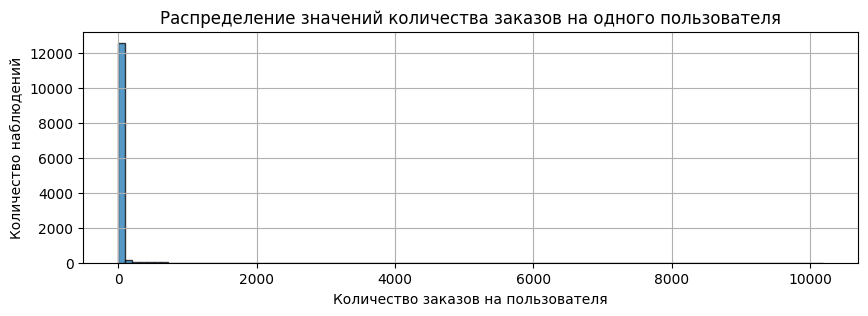

In [64]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим гистограмму распределения значений
profile_df_default['total_orders'].plot(
                kind='hist', 
                bins=100, # Устанавливаем количество корзин - всего 100
                alpha=0.75,
                edgecolor='black',
                rot=0,
)

# Настраиваем оформление графика
plt.title('Распределение значений количества заказов на одного пользователя')
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Количество наблюдений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

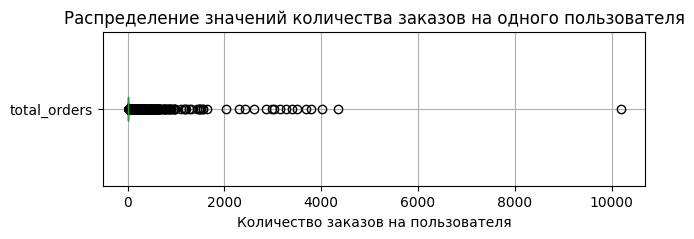

In [65]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений в столбце seats
profile_df_default.boxplot(column='total_orders', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества заказов на одного пользователя')
plt.xlabel('Количество заказов на пользователя')

# Выводим график
plt.show()

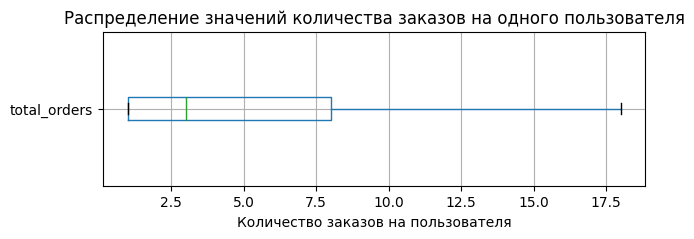

In [66]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений в столбце, убрав отображение выбросов
profile_df_default.boxplot(column='total_orders', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества заказов на одного пользователя')
plt.xlabel('Количество заказов на пользователя')

# Выводим график
plt.show()

Как видно, основные значения количества заказов распределены в диапазоне от 1 до 18 заказов на одного пользователя.

Наличие таких аномальных выбросов, особенно на горизонте данных всего за 5 месяцев, как и предполагалось выше, может указывать на использование аккаунтов отдельных пользователей коммерческими или иными организациями, которые на постоянной основе покупают билеты на различные мероприятия, возможно без надлежащей регистрации в качестве билетного оператора.

Даже при грубой прикидке, 10 000 заказов на протяжении 150 дней означает оформление порядка 65 заказов ежедневно, что точно не может расцениваться как обычное потребительское поведение.

Поэтому, в целях исключения влияния этих выбросов на дальнейшие исследования, проведем фильтрацию данных. Для получения наиболее реалистичных данных проведем фильтрацию по 95-перцентилю.

In [67]:
# фильтруем данные и создаем новый датасет для дальнейшей работы
profile_df = profile_df_default[profile_df_default['total_orders'] <= profile_df_default['total_orders'].quantile(0.95)]
profile_df['total_orders'].describe()

count    12261.000000
mean         6.429818
std          8.885647
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         54.000000
Name: total_orders, dtype: float64

Построим визуализацию данных еще раз, используя отфильтрованный датасет

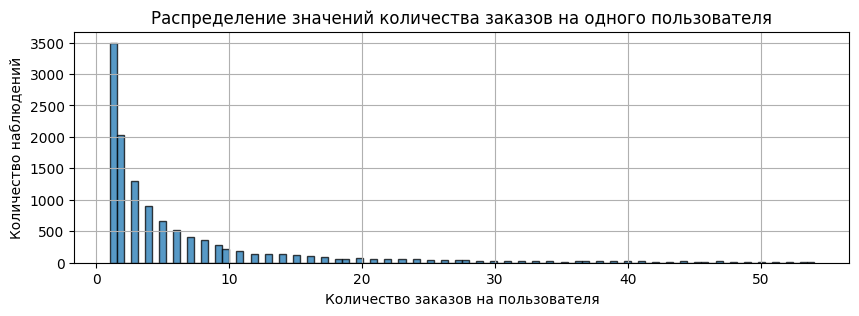

In [68]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим гистограмму распределения значений
profile_df['total_orders'].plot(
                kind='hist', 
                bins=100, # Устанавливаем количество корзин - всего 100
                alpha=0.75,
                edgecolor='black',
                rot=0,
)

# Настраиваем оформление графика
plt.title('Распределение значений количества заказов на одного пользователя')
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Количество наблюдений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

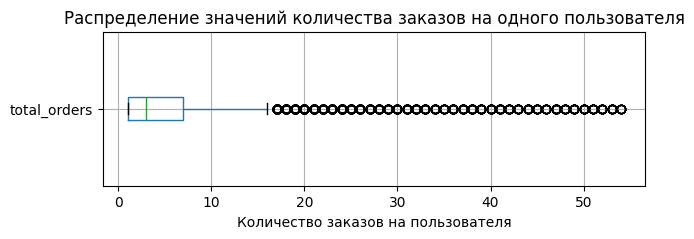

In [69]:
# Создаём контейнер графика
plt.figure(figsize=(7, 2))
# Строим диаграмму размаха значений в столбце seats
profile_df.boxplot(column='total_orders', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества заказов на одного пользователя')
plt.xlabel('Количество заказов на пользователя')

# Выводим график
plt.show()

**Промежуточный вывод**

Как видно, теперь данные имеют более равномерное распределение, при этом основной объем значений находится в диапазоне от 1 до 16-17 заказов на одного пользователя. Наблюдаются отдельные выбросы, но их количество представляется незначительным и невлияющим на дальнейшие исследования.

Перейдем к анализу статистических показателей в двух других столбцах.

In [70]:
profile_df['avg_tickets_count'].describe()

count    12261.000000
mean         2.732242
std          0.857114
min          1.000000
25%          2.000000
50%          2.750000
75%          3.083333
max          6.000000
Name: avg_tickets_count, dtype: float64

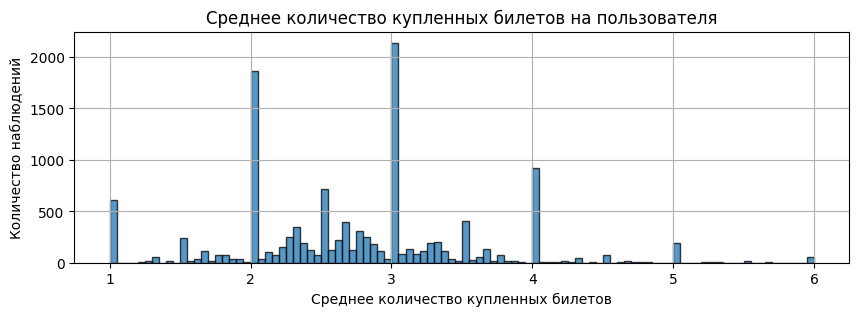

In [71]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим гистограмму распределения значений
profile_df['avg_tickets_count'].plot(
                kind='hist', 
                bins=100, # Устанавливаем количество корзин - всего 100
                alpha=0.75,
                edgecolor='black',
                rot=0,
)

# Настраиваем оформление графика
plt.title('Среднее количество купленных билетов на пользователя')
plt.xlabel('Среднее количество купленных билетов')
plt.ylabel('Количество наблюдений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

**Промежуточный вывод**

Как представляется, данные по столбцу `profile_df['avg_tickets_count']` в целом распределены нормально. Этот вывод следует из того, что явные всплески (выбросы) наблюдений приходится на значения в `1`, `2`, `3`, `4` и `5` билетов в заказе.

Такое распределение говорит о том, что большинство пользователей, совершающих повторные заказы, склонны все время покупать одно и то же количество билетов. 

Другая значительная часть пользователей регулярно покупает билеты в одном и том же диапазоне (`2` или `3`; `3` или `4`). Это объясняет заметные выбросы в середине диапазонов (`2.5` или `3.5`).

В целом можно заметить, что данные демонстрируют нормальное распределение с небольшим смещением (медиана и среднее значение практически совпадают).

In [72]:
profile_df['avg_days_since_prev'].describe()

count    12261.000000
mean         9.364638
std         11.605189
min          0.000000
25%          0.000000
50%          5.666667
75%         13.125000
max         63.000000
Name: avg_days_since_prev, dtype: float64

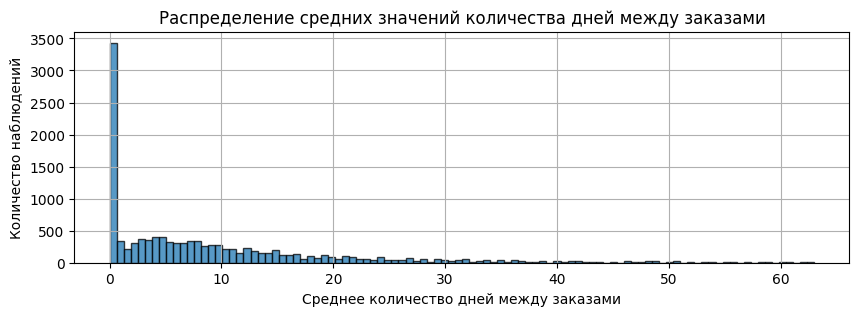

In [73]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 3))

# Строим гистограмму распределения значений
profile_df['avg_days_since_prev'].plot(
                kind='hist', 
                bins=100, # Устанавливаем количество корзин - всего 100
                alpha=0.75,
                edgecolor='black',
                rot=0,
)

# Настраиваем оформление графика
plt.title('Распределение средних значений количества дней между заказами')
plt.xlabel('Среднее количество дней между заказами')
plt.ylabel('Количество наблюдений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

**Промежуточный вывод**

Как видно, абсолютное большинство значений столбца `profile_df['avg_days_since_prev']` равны `0`. Это означает, что пользователи совершали повторные заказы в тот же день (либо каждый день). При этом ранее выявленные строки с пользователями, которые совершали заказы в одно и то же время, не оказывают влияние на такое распределение, т.к. даже без их учета остается более `3000` наблюдений.

В остальном, без учета этого выброса, данные демонстрируют правоассиметричное распределение и не демонстрируют других выбросов.

Теперь подсчитаем количество отфильтрованных строк.

In [74]:
# Посчитаем абсолютное и относительное значение отфильтрованных строк
diff_profile = profile_df_default.shape[0] - profile_df.shape[0]
diff_profile_share = round((profile_df_default.shape[0] - profile_df.shape[0]) / profile_df_default.shape[0], 2)
print(diff_profile)
print(diff_profile_share)

644
0.05


In [75]:
# Отразим информацию об итоговом датасете
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12261 entries, 0 to 12904
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              12261 non-null  object        
 1   first_order_dt       12261 non-null  datetime64[ns]
 2   last_order_dt        12261 non-null  datetime64[ns]
 3   first_device         12261 non-null  object        
 4   first_region         12261 non-null  object        
 5   first_service        12261 non-null  object        
 6   first_event          12261 non-null  object        
 7   total_orders         12261 non-null  int64         
 8   avg_revenue_rub      12261 non-null  float32       
 9   avg_tickets_count    12261 non-null  float64       
 10  avg_days_since_prev  12261 non-null  float64       
 11  is_2                 12261 non-null  int8          
 12  is_5                 12261 non-null  int8          
dtypes: datetime64[ns](2), float32(1), fl

Еще раз посчитаем агрегированные значения из профиля пользователя, на этот раз на отфильтрованных данных.

In [76]:
# считаем общее число пользователей в выборке
user_count = profile_df['user_id'].nunique()

# считаем среднее значение выручки с одного заказа
revenue_count = round(profile_df['avg_revenue_rub'].mean(), 2)

# считаем долю пользователей, совершивших 2 и более заказа
two_orders_share = round(profile_df['is_2'].mean(), 2)

# считаем долю пользователей, совершивших 5 и более заказов
five_orders_share = round(profile_df['is_5'].mean(), 2)

# отражаем полученные результаты
print(f'Общее количество пользователей: {user_count}')
print(f'Средняя выручка с одного заказа: {revenue_count:.2f} руб.')
print(f'Доля пользователей, совершивших 2 и более заказа: {two_orders_share}')
print(f'Доля пользователей, совершивших 5 и более заказов: {five_orders_share}')

Общее количество пользователей: 12261
Средняя выручка с одного заказа: 548.81 руб.
Доля пользователей, совершивших 2 и более заказа: 0.71
Доля пользователей, совершивших 5 и более заказов: 0.37


#### Общие выводы (доисследование)

[Содержимое проекта](#Содержимое-проекта)

1. Рассмотрены статистические показатели столбцов `total_orders`, `avg_tickets_count` и `avg_days_since_prev` датасета `profile_df_default`, а также распределение числовых значений в них.
2. Установлено, что в столбце `total_orders` основные значения сгруппированы в диапазоне от 1 до 18 заказов на пользователя, но присутствует явно аномальное значение в 10 188 заказов у одного пользователя.
3. С учетом этого, принято решение отфильтровать данные в столбце `total_orders` по 95-перцентилю. Как результат, создан датасет `profile_df` для дальнейшей работы. Два других столбца анализировались по уже отфильтрованному датасету.
4. Данные по столбцу `avg_tickets_count` в целом демонстрируют нормальное распределение с небольшим правоассиметричным смещением. Фильтрация этих данных не требуется.
5. Абсолютное большинство значений столбца `avg_days_since_prev` равны `0`. Это означает, что пользователи совершали повторные заказы в тот же день (либо каждый день). В остальном, без учета этого выброса, данные демонстрируют правоассиметричное распределение и не демонстрируют других выбросов. Фильтрация этих данных не требуется.
6. Как было сказано, по итогам фильтрации создан датасет `profile_df` с `12 261` строками и `13` столбцами. Удалено (отфильтровано) `644` строки или `5%` от исходных строк.
7. На основе отфильтрованного датасета рассчитаны агрегированные показатели, которые имеют следующие значения:
    - Общее количество пользователей: `12 261`
    - Средняя выручка с одного заказа: `548.81` руб.
    - Доля пользователей, совершивших `2 и более заказа`: `0.71`
    - Доля пользователей, совершивших `5 и более заказов`: `0.37`

## Исследовательский анализ данных

[Содержимое проекта](#Содержимое-проекта)

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.

### Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя

#### **Задача - распределение пользователей** 

[Содержимое проекта](#Содержимое-проекта)

Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [77]:
# Сгруппируем пользователей по заявленным признакам
# Для удобства по каждому признаку создадим отдельный датасет,
# в котором рассчитаем абсолютные и относительные показатели

# Группируем пользователей по типу первого мероприятия
first_event_df = pd.DataFrame()
first_event_df['first_event_grouped'] = profile_df.groupby('first_event')['user_id'].count().sort_values(ascending=False)
first_event_df['first_event_share'] = round(first_event_df['first_event_grouped'] / profile_df.shape[0], 4)

# Группируем пользователей по типу первого устройства
first_device_df = pd.DataFrame()
first_device_df['first_device_grouped'] = profile_df.groupby('first_device')['user_id'].count().sort_values(ascending=False)
first_device_df['first_device_share'] = round(first_device_df['first_device_grouped'] / profile_df.shape[0], 4)

# Группируем пользователей по типу первого региона
first_region_df = pd.DataFrame()
first_region_df['first_region_grouped'] = profile_df.groupby('first_region')['user_id'].count().sort_values(ascending=False)
first_region_df['first_region_share'] = round(first_region_df['first_region_grouped'] / profile_df.shape[0], 4)

# Группируем пользователей по первому билетному оператору
first_service_df = pd.DataFrame()
first_service_df['first_sercive_grouped'] = profile_df.groupby('first_service')['user_id'].count().sort_values(ascending=False)
first_service_df['first_service_share'] = round(first_service_df['first_sercive_grouped'] / profile_df.shape[0], 4)

In [78]:
# Отражаем результаты датасета первых мероприятий
display(first_event_df)

,first_event_grouped,first_event_share
first_event,,
концерты,5245,0.4278
другое,2853,0.2327
театр,2668,0.2176
стендап,630,0.0514
спорт,520,0.0424
выставки,270,0.0220
ёлки,75,0.0061


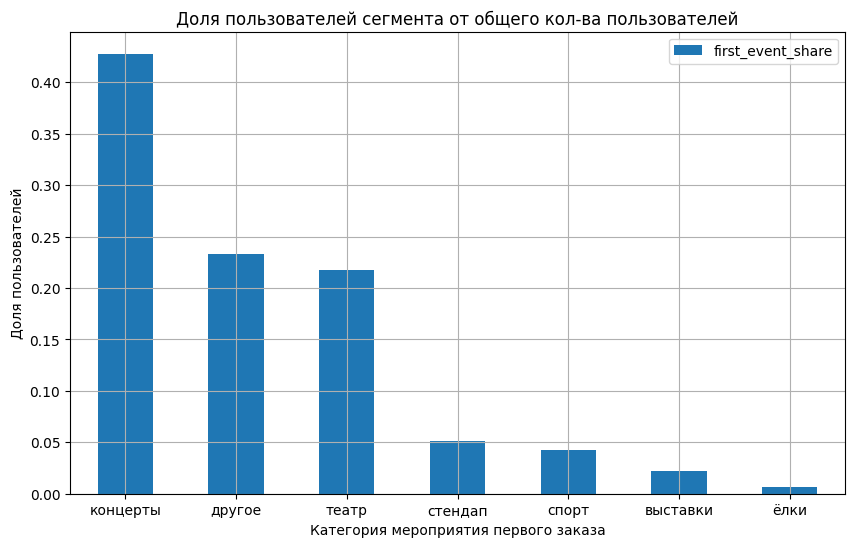

In [79]:
# Визуализируем значения долей пользователей каждого сегмента
plt.figure(figsize=(10, 4))

first_event_df['first_event_share'].plot(kind='bar',
               title=f'Доля пользователей сегмента от общего кол-ва пользователей',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Категория мероприятия первого заказа',
               rot=0,
               figsize=(10, 6))

plt.grid()
plt.legend()

plt.show()

Как видно, основными категориями для "входа" являются `концерты` (`43%` пользователей) и `театры` (`23%` пользователей).

In [80]:
# Отразим датасет первых устройств
display(first_device_df)

,first_device_grouped,first_device_share
first_device,,
mobile,10102,0.8239
desktop,2159,0.1761


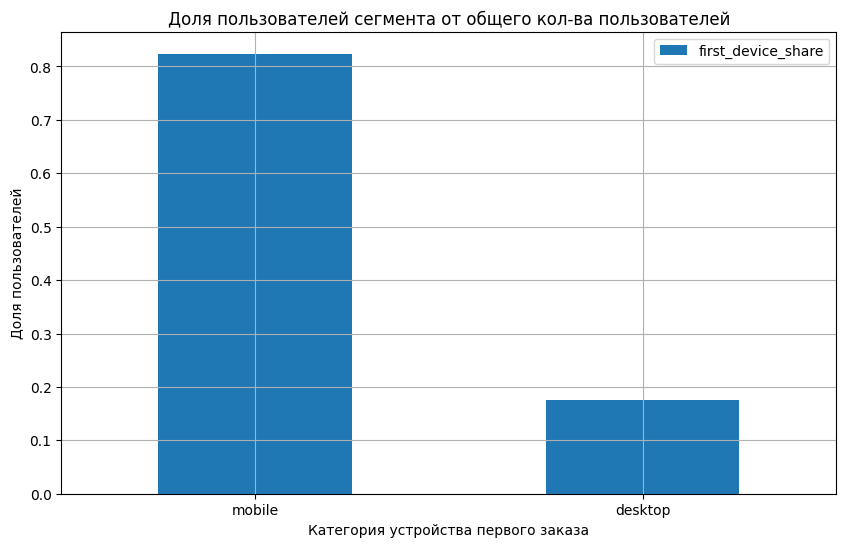

In [81]:
# Визуализируем значения долей пользователей каждого сегмента
plt.figure(figsize=(10, 4))

first_device_df['first_device_share'].plot(kind='bar',
               title=f'Доля пользователей сегмента от общего кол-ва пользователей',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Категория устройства первого заказа',
               rot=0,
               figsize=(10, 6))

plt.grid()
plt.legend()

plt.show()

Как видно, подавляющее большинство пользователей делает первый заказ с мобильного телефона (`82%` пользователей).

In [82]:
# отразим датасет первых регионов
display(first_region_df.head(10))

,first_region_grouped,first_region_share
first_region,,
Каменевский регион,3982,0.3248
Североярская область,2121,0.1730
Широковская область,776,0.0633
Озернинский край,397,0.0324
Светополянский округ,310,0.0253
Малиновоярский округ,299,0.0244
Речиновская область,254,0.0207
Травяная область,245,0.0200
Яблоневская область,235,0.0192


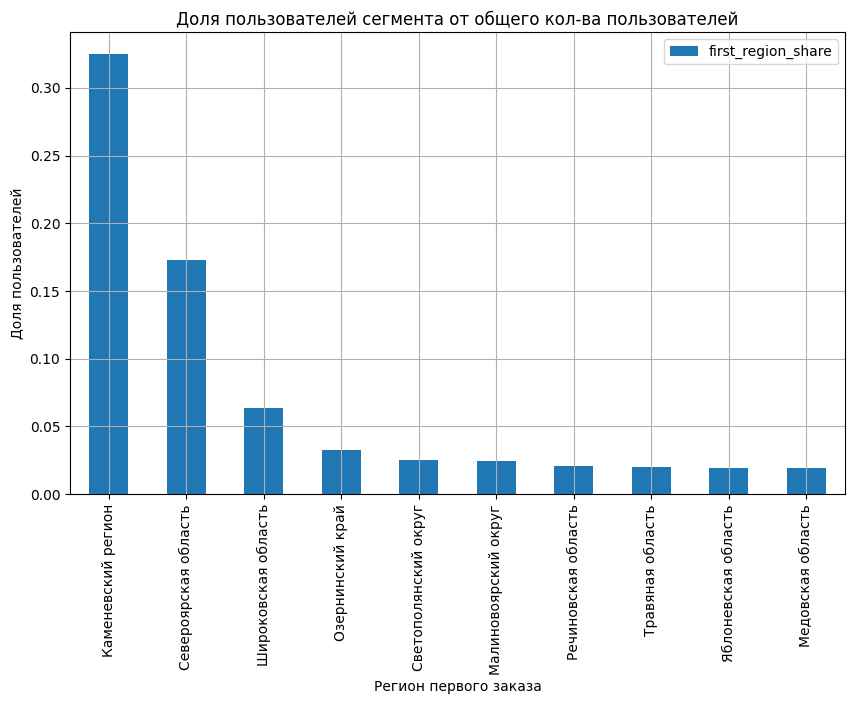

In [83]:
# Визуализируем значения долей пользователей каждого сегмента
plt.figure(figsize=(10, 4))

first_region_df['first_region_share'].head(10).plot(kind='bar',
               title=f'Доля пользователей сегмента от общего кол-ва пользователей',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Регион первого заказа',
               rot=90,
               figsize=(10, 6))

plt.grid()
plt.legend()

plt.show()

Как видно, основными регионами для "входа" являются `Каменевский регион` (`33%` пользователей) и `Североярская область` (`17%` пользователей).

In [84]:
# отразим датасет первых билетных операторов
display(first_service_df.head(10))

,first_sercive_grouped,first_service_share
first_service,,
Билеты без проблем,2735,0.2231
Лови билет!,1648,0.1344
Мой билет,1495,0.1219
Билеты в руки,1479,0.1206
Облачко,1284,0.1047
Лучшие билеты,762,0.0621
Весь в билетах,714,0.0582
Прачечная,408,0.0333
Край билетов,263,0.0215


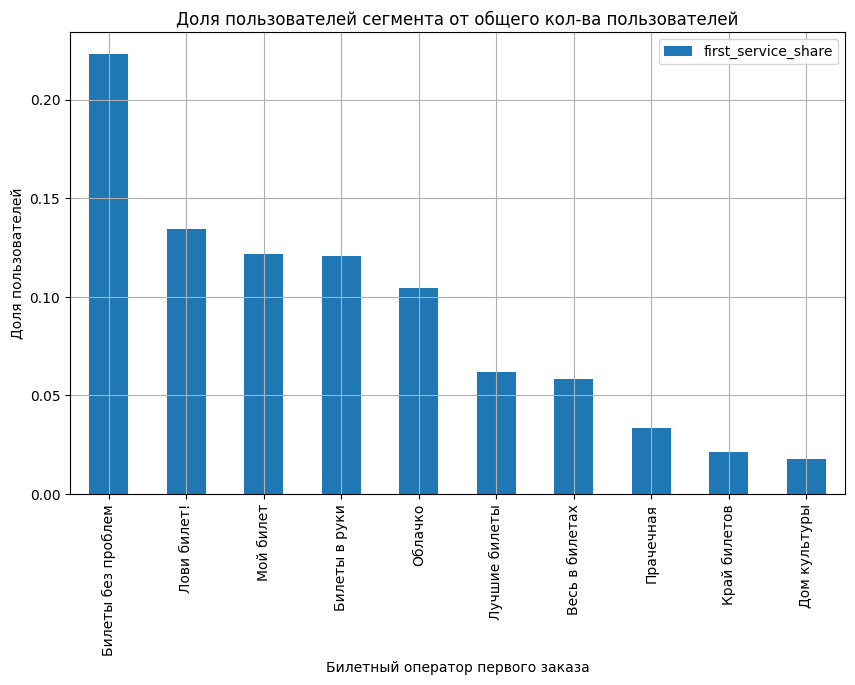

In [85]:
# Визуализируем значения долей пользователей каждого сегмента
plt.figure(figsize=(10, 4))

first_service_df['first_service_share'].head(10).plot(kind='bar',
               title=f'Доля пользователей сегмента от общего кол-ва пользователей',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Билетный оператор первого заказа',
               rot=90,
               figsize=(10, 6))

plt.grid()
plt.legend()

plt.show()

Как видно, основными билетными операторами для "входа" являются `Билеты без проблем` (`22%` пользователей), а также операторы `Лови билет!`, `Мой билет`, `Билеты в руки` и `Облачко` с примерно одинаковым количеством пользователей (по `10%` - `13%` пользователей).

**Общие выводы**

[Содержимое проекта](#Содержимое-проекта)

На исследовательский вопрос "равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?" можно ответить следующим образом:

Да, есть сегменты с наибольшим числом пользователей, которые представлены так:
- Больше всего пользователей совершает первый заказ при покупке билетов на `концерты` (`43%` пользователей);
- Больше всего пользователей совершает первый заказ с `мобильного телефона` (`82%` пользователей);
- Больше всего пользователей совершает первый заказ из `Каменевского региона` (`33%` пользователей);
- Больше всего пользователей совершает первый заказ через оператора `Билеты без проблем` (`22%` пользователей).

---

#### **Задача - повторные заказы** 

[Содержимое проекта](#Содержимое-проекта)

Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [86]:
# Добавим к ранее полученным датасетам информацию о доле пользователей с повторными заказами
first_event_df['is_2_share'] = profile_df.groupby('first_event')['is_2'].mean()
first_device_df['is_2_share'] = profile_df.groupby('first_device')['is_2'].mean()
first_region_df['is_2_share'] = profile_df.groupby('first_region')['is_2'].mean()
first_service_df['is_2_share'] = profile_df.groupby('first_service')['is_2'].mean()

In [87]:
# Отражаем результаты датасета первых мероприятий
display(first_event_df)

,first_event_grouped,first_event_share,is_2_share
first_event,,,
концерты,5245,0.4278,0.716111
другое,2853,0.2327,0.721696
театр,2668,0.2176,0.714768
стендап,630,0.0514,0.709524
спорт,520,0.0424,0.692308
выставки,270,0.0220,0.692593
ёлки,75,0.0061,0.626667


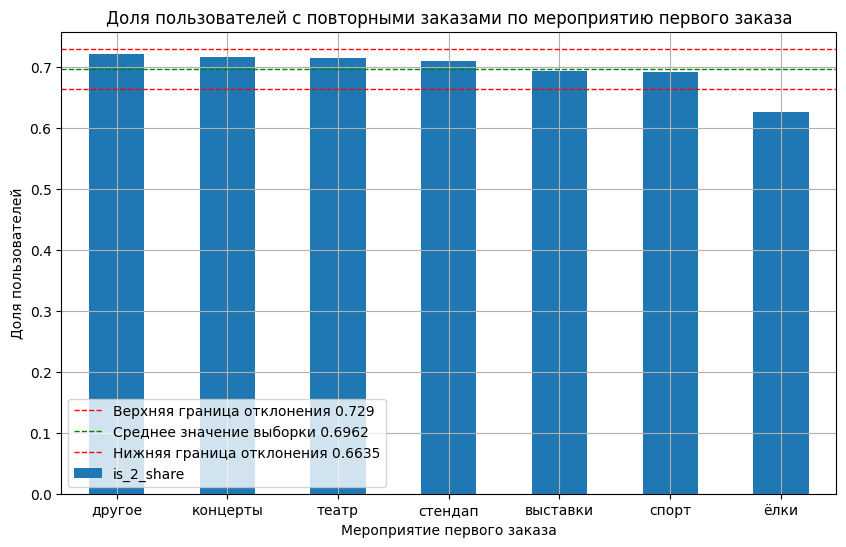

In [88]:
# построим график группировки для лучшего восприятия
first_event_df['is_2_share'].sort_values(ascending=False).plot(kind='bar',
               title=f'Доля пользователей с повторными заказами по мероприятию первого заказа',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Мероприятие первого заказа',
               rot=0,
               figsize=(10, 6))

share_plus_std = first_event_df['is_2_share'].mean() + first_event_df['is_2_share'].std()
share_mean = first_event_df['is_2_share'].mean()
share_minus_std = first_event_df['is_2_share'].mean() - first_event_df['is_2_share'].std()

# Наносим на график линии со средним значением доли и границами стандартного отклонения
# Будет использовать эти линии для ответа на поставленный вопрос

plt.axhline(share_plus_std,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Верхняя граница отклонения {round(share_plus_std, 4)}')

plt.axhline(share_mean,
            color='green',
            linestyle='--',
            linewidth=1,
            label=f'Среднее значение выборки {round(share_mean, 4)}')

plt.axhline(share_minus_std,
            color='red', 
            linestyle='--',
            linewidth=1,
            label=f'Нижняя граница отклонения {round(share_minus_std, 4)}')

plt.grid()
plt.legend()

plt.show()

In [89]:
# Отражаем результаты датасета первых устройств
display(first_device_df)

,first_device_grouped,first_device_share,is_2_share
first_device,,,
mobile,10102,0.8239,0.711344
desktop,2159,0.1761,0.730431


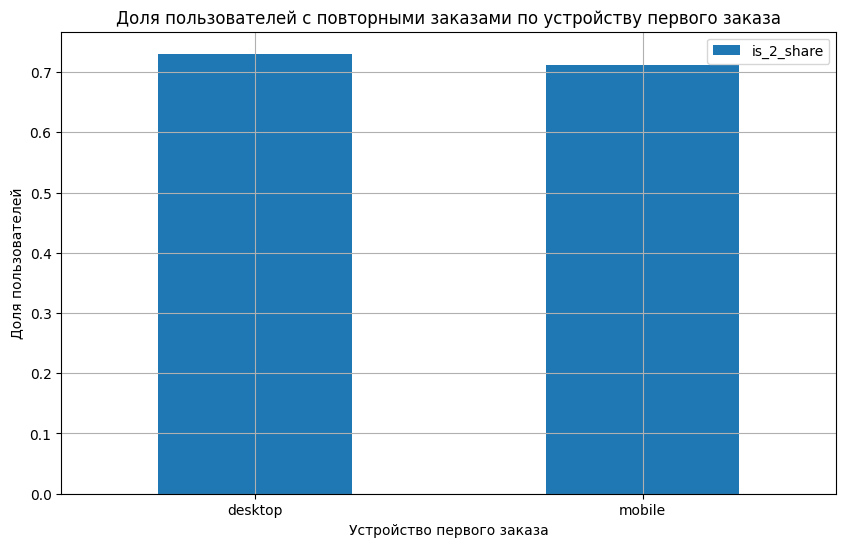

In [90]:
# построим график группировки для лучшего восприятия
first_device_df['is_2_share'].sort_values(ascending=False).plot(kind='bar',
               title=f'Доля пользователей с повторными заказами по устройству первого заказа',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Устройство первого заказа',
               rot=0,
               figsize=(10, 6))

plt.grid()
plt.legend()

plt.show()

In [91]:
# Отражаем результаты датасета первых регионов, отобрав топ-10 по количеству пользователей
display(first_region_df.head(10))

,first_region_grouped,first_region_share,is_2_share
first_region,,,
Каменевский регион,3982,0.3248,0.715721
Североярская область,2121,0.1730,0.737860
Широковская область,776,0.0633,0.719072
Озернинский край,397,0.0324,0.627204
Светополянский округ,310,0.0253,0.706452
Малиновоярский округ,299,0.0244,0.688963
Речиновская область,254,0.0207,0.692913
Травяная область,245,0.0200,0.710204
Яблоневская область,235,0.0192,0.710638


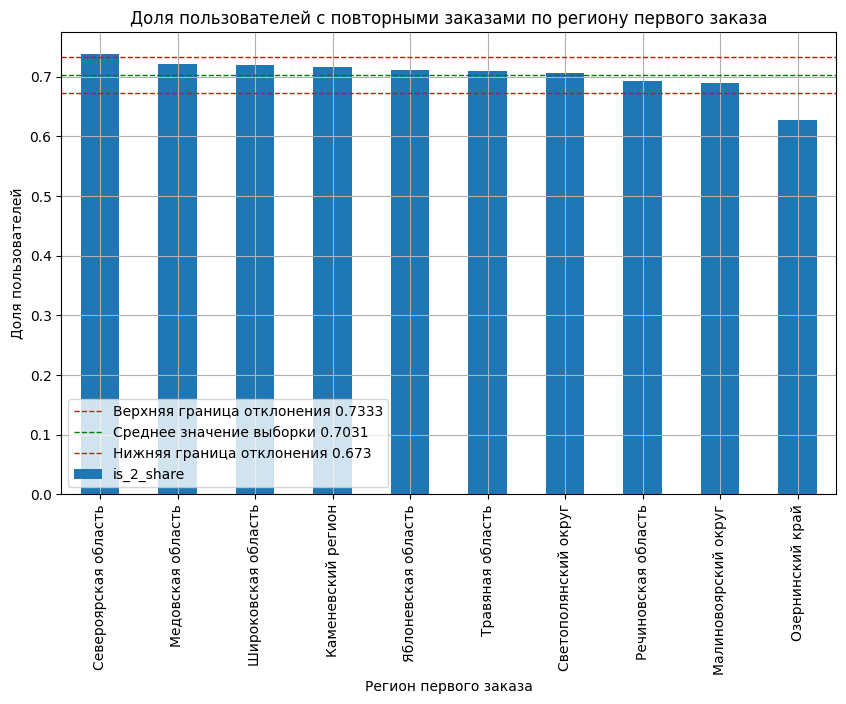

In [92]:
# построим график группировки для лучшего восприятия
first_region_df['is_2_share'].head(10).sort_values(ascending=False).plot(kind='bar',
               title=f'Доля пользователей с повторными заказами по региону первого заказа',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Регион первого заказа',
               rot=90,
               figsize=(10, 6))

share_plus_std = first_region_df['is_2_share'].head(10).mean() + first_region_df['is_2_share'].head(10).std()
share_mean = first_region_df['is_2_share'].head(10).mean()
share_minus_std = first_region_df['is_2_share'].head(10).mean() - first_region_df['is_2_share'].head(10).std()

# Наносим на график линии со средним значением доли и границами стандартного отклонения
# Будет использовать эти линии для ответа на поставленный вопрос
plt.axhline(share_plus_std,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Верхняя граница отклонения {round(share_plus_std, 4)}')

plt.axhline(share_mean,
            color='green',
            linestyle='--',
            linewidth=1,
            label=f'Среднее значение выборки {round(share_mean, 4)}')

plt.axhline(share_minus_std,
            color='red', 
            linestyle='--',
            linewidth=1,
            label=f'Нижняя граница отклонения {round(share_minus_std, 4)}')
plt.grid()
plt.legend()

plt.show()

In [93]:
# Отражаем результаты датасета первых операторов, отобрав топ-10 по количеству пользователей
display(first_service_df.head(10))

,first_sercive_grouped,first_service_share,is_2_share
first_service,,,
Билеты без проблем,2735,0.2231,0.733090
Лови билет!,1648,0.1344,0.701456
Мой билет,1495,0.1219,0.682274
Билеты в руки,1479,0.1206,0.734280
Облачко,1284,0.1047,0.708723
Лучшие билеты,762,0.0621,0.703412
Весь в билетах,714,0.0582,0.710084
Прачечная,408,0.0333,0.745098
Край билетов,263,0.0215,0.768061


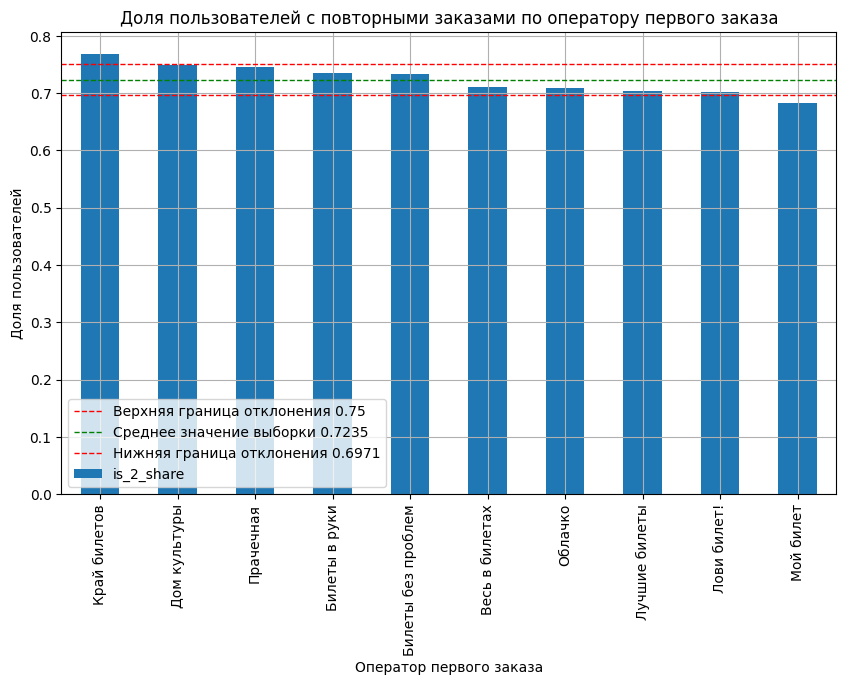

In [94]:
# построим график группировки для лучшего восприятия
first_service_df['is_2_share'].head(10).sort_values(ascending=False).plot(kind='bar',
               title=f'Доля пользователей с повторными заказами по оператору первого заказа',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Оператор первого заказа',
               rot=90,
               figsize=(10, 6))

share_plus_std = first_service_df['is_2_share'].head(10).mean() + first_service_df['is_2_share'].head(10).std()
share_mean = first_service_df['is_2_share'].head(10).mean()
share_minus_std = first_service_df['is_2_share'].head(10).mean() - first_service_df['is_2_share'].head(10).std()

# Наносим на график линии со средним значением доли и границами стандартного отклонения
# Будет использовать эти линии для ответа на поставленный вопрос
plt.axhline(share_plus_std,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Верхняя граница отклонения {round(share_plus_std, 4)}')

plt.axhline(share_mean,
            color='green',
            linestyle='--',
            linewidth=1,
            label=f'Среднее значение выборки {round(share_mean, 4)}')

plt.axhline(share_minus_std,
            color='red', 
            linestyle='--',
            linewidth=1,
            label=f'Нижняя граница отклонения {round(share_minus_std, 4)}')
plt.grid()
plt.legend()

plt.show()

**Общие выводы**

[Содержимое проекта](#Содержимое-проекта)

1. При анализе ранее сформированных сегментов установлено, что в целом доля пользователей, совершивших повторный заказ, примерно одинакова для всех сегментов.
2. Так, для группировки пользователей по `мероприятию` первого заказа установлено, что во всех сегментах доля пользователей с повторными заказами колеблется вокруг среднего значения и находится в пределах стандартного отклонения, кроме сегмента `ёлки`, где доля пользователей с повторными заказами существенно ниже среднего значения (`62%` против `70%`.)
3. Для группировки пользователей по `устройству` первого заказа установлено, что оба сегмента имеют примерно одинаковые доли пользователей, совершивших повторные заказы (`71%` и `73%`).
4. Для группировки пользователей по `региону` первого заказа установлено, что только в `Североярской области` доля пользователей с повторными заказами выходит за границы стандартного отклонения (`74%`), тогда как доли для остальных регионов колеблются вокруг среднего значения в пределах отклонения.
5. Наконец, для группировки пользователей по `оператору` первого заказа установлено, что значения самых крупных сегментов (`Билеты без проблем` и др.) колеблются вокруг среднего значения в пределах отклонения (`72%`). Есть оператор, выходящий за пределы отклонения – `Край билетов`, но у него слишком мало пользователей (`263`), чтобы это значение можно было принимать во внимание.

#### **Задача - продуктовые гипотезы** 

[Содержимое проекта](#Содержимое-проекта)

Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

**Ответ на гипотезу 1:**
Нет, эта гипотеза не подтверждается. В целом тип мероприятия первого заказа не влияет на совершение повторных заказов. При этом наоборот, пользователи, купившие первый билет на концерт, чаще совершают повторный заказ, чем пользователи, купившие первый билет на спортивное мероприятие. Но эта разница незначительна.

**Ответ на гипотезу 2:**
Нет, эта гипотеза не подтверждается. В целом регион первого заказа не влияет на вероятность на совершение повторных заказов.

### Исследование поведения пользователей через показатели выручки и состава заказа

[Содержимое проекта](#Содержимое-проекта)

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

#### **Задача - связь выручки и повторных заказов** 

[Содержимое проекта](#Содержимое-проекта)

Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---

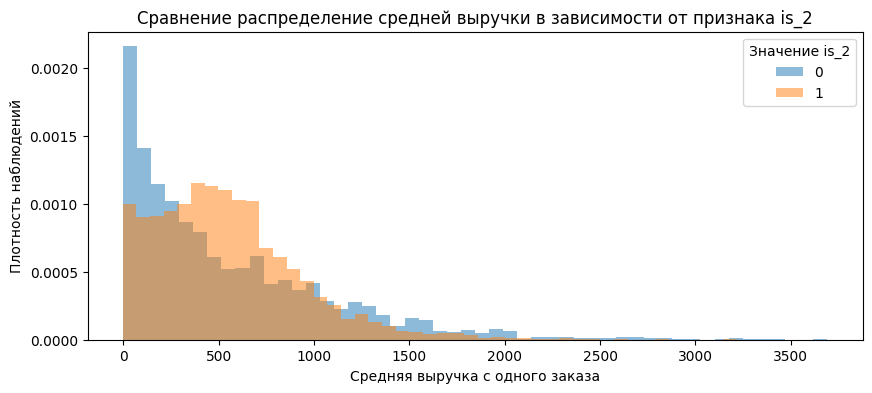

In [95]:
# Строим гистограмму распределения значений выручки
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения is_2
for i in profile_df['is_2'].unique():
    # Фильтруем данные по значению столбца is_2
    profile_df.loc[profile_df['is_2'] == i, 'avg_revenue_rub'].plot(
        kind='hist',
        bins=50,
        alpha=0.5,
        label=f'{i}',
        legend=True,
        density=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение средней выручки в зависимости от признака is_2')
plt.xlabel('Средняя выручка с одного заказа')
plt.ylabel('Плотность наблюдений')
plt.legend(title='Значение is_2')
plt.show()

In [96]:
# добавим статистические показатели для более точного анализа
display(profile_df.loc[profile_df['is_2'] == 0, 'avg_revenue_rub'].describe())

count    3498.000000
mean      550.260498
std       539.607178
min        -3.590000
25%       134.264999
50%       382.459991
75%       818.490021
max      3692.060059
Name: avg_revenue_rub, dtype: float64

In [97]:
# добавим статистические показатели для более точного анализа
display(profile_df.loc[profile_df['is_2'] == 1, 'avg_revenue_rub'].describe())

count    8763.000000
mean      548.229126
std       389.919556
min        -3.205000
25%       263.045013
50%       494.200470
75%       741.387787
max      3575.010010
Name: avg_revenue_rub, dtype: float64

**Ответы на вопросы**

Ответ на вопрос 1:
- Основные статистические показатели у рассматриваемых групп совпадают. Они имеют близкие средние значения, практически совпадают максимальные и минимальные границы диапазонов.
- Для группы пользователей без повторных заказов диапазон выручки следующий: от `-3.59` до `3 692.06` руб.
- Для группы с повторными заказами - от `-3.20` до `3 575.01` руб.

Ответ на вопрос 2:
- Первое заметное отличие - у группы пользователей без повторных заказов больше всего значений выручки сгруппировано в районе `100-200` руб. Статистически это выражено в более низкой границе 0.25 перцентиля: `134` руб. против `263` руб. у другой группы.
- Явно заметно, что мода значений средней выручки у первой группы находится около `0` руб., тогда как у второй группы - в районе `400` руб.
- Также у первой группы более низкая медиана, но при этом более высокая граница 0.75 перцентиля. Это указывает на более выраженный разброс данных, нежели у второй группы.
- Визуально это отражается на графике через более равномерную плотность наблюдений значений выручки у второй группы: в диапазоне от `0` до `750` руб. данные встречаются примерно с одинаковой плотностью.
- Наконец, более низкое стандартное отклонение у второй группы также показывает на более плотную группировку значений выручки по сравнению с первой группой.

В заключение можно отметить, что пользователи, имеющие повторные заказы, в целом приносят более высокую среднюю выручку с заказа, чем пользователи, сделавшие только один заказ. 

#### **Задача - сравнение распределения выручки** 

[Содержимое проекта](#Содержимое-проекта)

Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


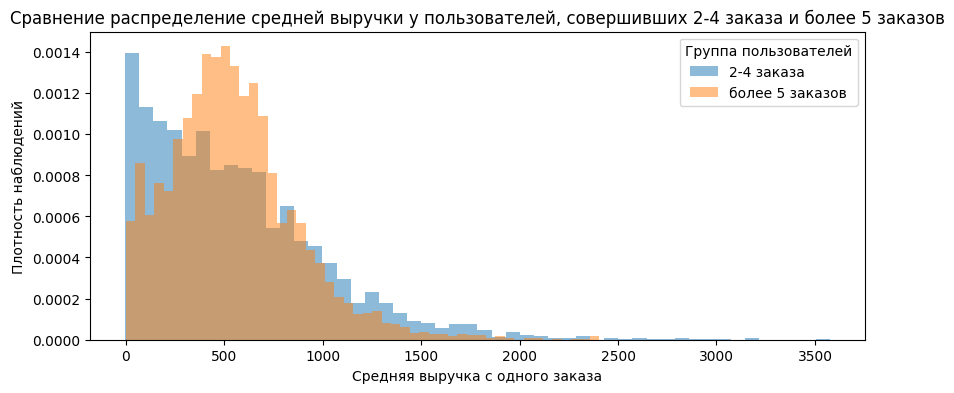

In [98]:
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения is_2
profile_df.loc[(profile_df['is_2'] == 1) & (profile_df['is_5'] == 0), 'avg_revenue_rub'].plot(
        kind='hist',
        bins=50,
        alpha=0.5,
        legend=True,
        density=True,
        label='2-4 заказа'
    )

profile_df.loc[(profile_df['is_5'] == 1), 'avg_revenue_rub'].plot(
        kind='hist',
        bins=50,
        alpha=0.5,
        legend=True,
        density=True,
        label='более 5 заказов'
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение средней выручки у пользователей, совершивших 2-4 заказа и более 5 заказов')
plt.xlabel('Средняя выручка с одного заказа')
plt.ylabel('Плотность наблюдений')
plt.legend(title='Группа пользователей')
plt.show()

In [99]:
# добавим статистические показатели для более точного анализа
display(profile_df.loc[(profile_df['is_2'] == 1) & (profile_df['is_5'] == 0), 'avg_revenue_rub'].describe())

count    4246.000000
mean      553.249146
std       447.233978
min        -3.205000
25%       206.507496
50%       468.304993
75%       790.608780
max      3575.010010
Name: avg_revenue_rub, dtype: float64

In [100]:
# добавим статистические показатели для более точного анализа
display(profile_df.loc[(profile_df['is_5'] == 1), 'avg_revenue_rub'].describe())

count    4517.000000
mean      543.510254
std       326.991272
min         0.000000
25%       321.059998
50%       510.372009
75%       709.983032
max      2405.354004
Name: avg_revenue_rub, dtype: float64

**Ответ на вопрос**

- Различия в значениях средней выручки с заказа между рассматриваемыми группами похожи на выборки из предыдущей задачи.
- Первая группа (2-4 заказа) демонстрирует правоассиметричное распределение с модой значений около `0` руб. и более высоким стандартным отклонением. 
- Так же как и в предыдущей задаче, первая группая демонстрирует более широкий разброс данных. Если брать в качестве основного диапазона данных 25 и 75 перцентили, то здесь значения находятся в диапазоне от `206` до `790` руб. при среднем медиане `468` руб.
- Вторая группа демонстрирует практически нормальное распределение (не считая отсечки слева на 0 руб.). Рассматривая по аналогии, можно отметить, что здесь основные значения находятся в диапазоне от `321` до `709` руб. при медиане `510` руб. Это указывает на меньший разброс данных в выборке.
- В заключение можно отметить, что пользователи, совершающие 5 и более заказов, в целом приносят более высокую среднюю выручку с заказа, чем пользователи, сделавшие 2-4 заказа.  

[Содержимое проекта](#Содержимое-проекта)

#### **Задача - количество билетов и повторная покупка** 

[Содержимое проекта](#Содержимое-проекта)

Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [101]:
# Создадим сегменты в соответствии с поставленными условиями
profile_df['tickets_group'] = pd.cut(profile_df['avg_tickets_count'], bins=[1, 2, 3, 5, 11], labels=["1-2 билета", "2-3 билета", "3-5 билетов", "более 5 билетов"], include_lowest = True)

# Отразим результаты подсчета абсолютных значений
display(profile_df.groupby('tickets_group')['user_id'].count())

# И относительных значений
display(round(profile_df.groupby('tickets_group')['is_2'].mean(), 2))

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\857486299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_df['tickets_group'] = pd.cut(profile_df['avg_tickets_count'], bins=[1, 2, 3, 5, 11], labels=["1-2 билета", "2-3 билета", "3-5 билетов", "более 5 билетов"], include_lowest = True)
C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\857486299.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(profile_df.groupby('tickets_group')['user_id'].count())


tickets_group
1-2 билета         3186
2-3 билета         5914
3-5 билетов        3069
более 5 билетов      92
Name: user_id, dtype: int64

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\857486299.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(round(profile_df.groupby('tickets_group')['is_2'].mean(), 2))


tickets_group
1-2 билета         0.51
2-3 билета         0.82
3-5 билетов        0.74
более 5 билетов    0.39
Name: is_2, dtype: float64

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\618244552.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_df.groupby('tickets_group')['user_id'].count().sort_values(ascending=False).plot(kind='bar',


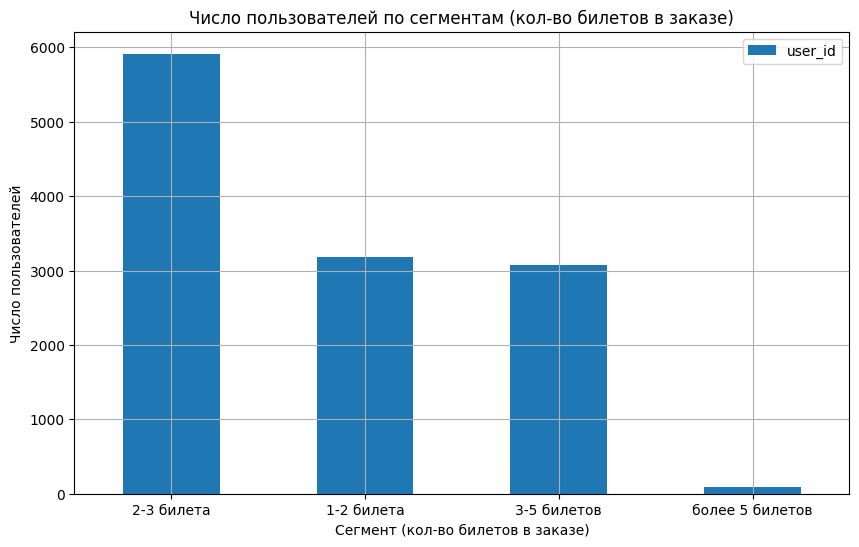

In [102]:
# Строим столбчатый график абсолютных значений
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим график. Сделаем сортировку значений для наглядности
profile_df.groupby('tickets_group')['user_id'].count().sort_values(ascending=False).plot(kind='bar',
               title=f'Число пользователей по сегментам (кол-во билетов в заказе)',
               legend=True,
               ylabel='Число пользователей',
               xlabel='Сегмент (кол-во билетов в заказе)',
               rot=0,
               figsize=(10, 6))

plt.grid()
plt.legend()

plt.show()

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\2430488335.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_df.groupby('tickets_group')['is_2'].mean().sort_values(ascending=False).plot(kind='bar',


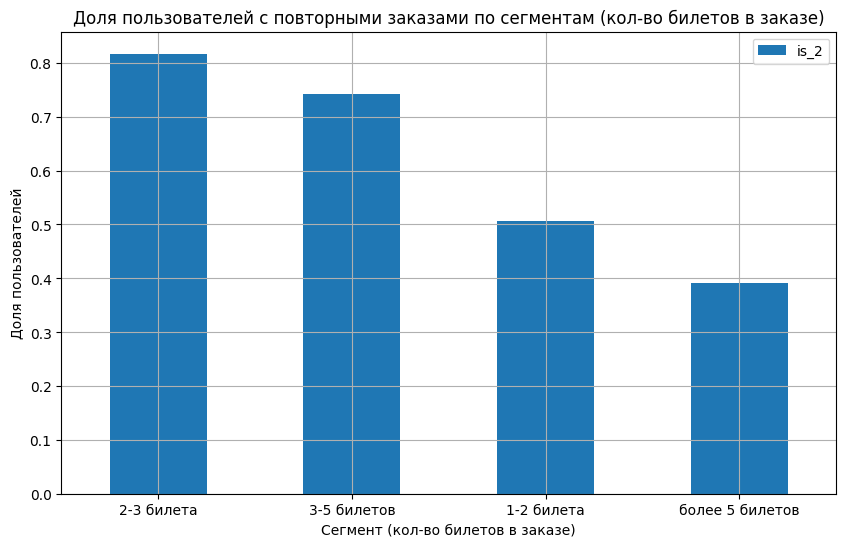

In [103]:
# Строим столбчатый график относительных значений
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим график. Сделаем сортировку значений для наглядности
profile_df.groupby('tickets_group')['is_2'].mean().sort_values(ascending=False).plot(kind='bar',
               title=f'Доля пользователей с повторными заказами по сегментам (кол-во билетов в заказе)',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='Сегмент (кол-во билетов в заказе)',
               rot=0,
               figsize=(10, 6))

plt.grid()
plt.legend()

plt.show()

**Ответ на вопросы**

Ответ на вопрос 1:
- Большинство пользователей находится в сегменте `2-3 билета` - `5 914` пользователей.
- Еще в двух сегментах находится примерно одинаковое количество пользователей: `3 186` пользователей для сегмента `1-2 билета` и `3 069` пользователей для сегмента `3-5 билетов`
- Количество пользователей в последнем сегменте незначительно - всего `92` пользователя (`более 5 билетов`)
- Таким образом, можно заключить, что около `50%` пользователей приходится всего на 1 сегмент - `2-3 билета`. То есть пользователи сконцентрированны в этом сегменте.

Ответ на вопрос 2:
- Можно заключить, что самый многочисленный сегмент `2-3 билета` обладает также и самой высокой долей пользователей с повторными заказами - `82%` из пользователей совершают заказы вновь. Сегмент `3-5` билетов также демонстрирует высокое значение пользователей с повторными заказами (`74%`).
- Долю пользователей с повторными заказами в двух других сегментах едва ли можно назвать аномально низкой, но она существенно меньше двух упомянутых сегментов.

[Содержимое проекта](#Содержимое-проекта)

---

### Исследование временных характеристик первого заказа и их влияния на повторные покупки

[Содержимое проекта](#Содержимое-проекта)

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

#### **Задача - связь дня недели и поведения пользователей** 

[Содержимое проекта](#Содержимое-проекта)

Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [104]:
# Создадим новый столбец в датасете с названием дня недели
profile_df['day_of_week'] = profile_df['first_order_dt'].dt.day_name()

# Сразу отразим искомые абсолютные и относительные значения 
display(profile_df.groupby('day_of_week')['user_id'].count().sort_values(ascending=False))
display(round(profile_df.groupby('day_of_week')['is_2'].mean().sort_values(ascending=False), 4))

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\3496543478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_df['day_of_week'] = profile_df['first_order_dt'].dt.day_name()


day_of_week
Thursday     1869
Friday       1851
Wednesday    1846
Tuesday      1839
Saturday     1739
Monday       1612
Sunday       1505
Name: user_id, dtype: int64

day_of_week
Friday       0.7288
Tuesday      0.7281
Saturday     0.7200
Monday       0.7159
Sunday       0.7130
Thursday     0.7004
Wednesday    0.6972
Name: is_2, dtype: float64

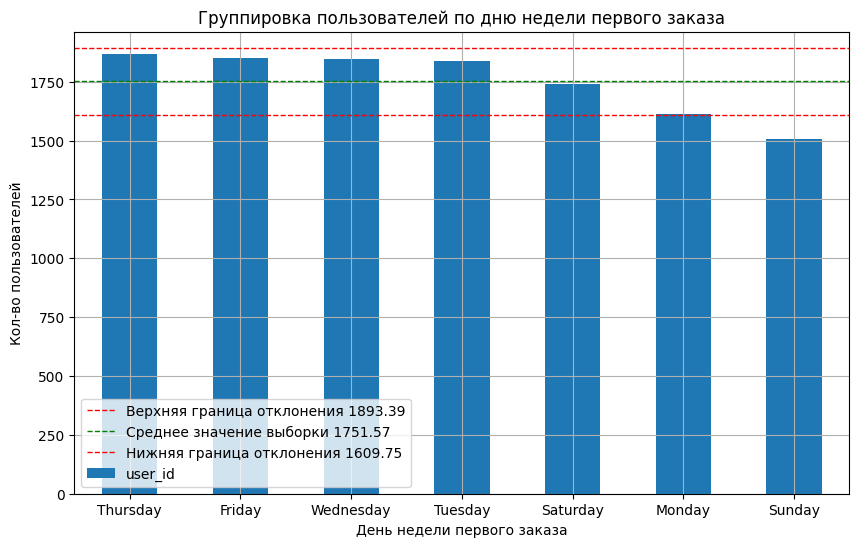

In [105]:
# построим график группировки для лучшего восприятия
profile_df.groupby('day_of_week')['user_id'].count().sort_values(ascending=False).plot(kind='bar',
               title=f'Группировка пользователей по дню недели первого заказа',
               legend=True,
               ylabel='Кол-во пользователей',
               xlabel='День недели первого заказа',
               rot=0,
               figsize=(10, 6))

share_plus_std = profile_df.groupby('day_of_week')['user_id'].count().mean() + profile_df.groupby('day_of_week')['user_id'].count().std()
share_mean = profile_df.groupby('day_of_week')['user_id'].count().mean()
share_minus_std = profile_df.groupby('day_of_week')['user_id'].count().mean() - profile_df.groupby('day_of_week')['user_id'].count().std()

# Наносим на график линии со средним значением доли и границами стандартного отклонения
# Будет использовать эти линии для ответа на поставленный вопрос

plt.axhline(share_plus_std,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Верхняя граница отклонения {round(share_plus_std, 2)}')

plt.axhline(share_mean,
            color='green',
            linestyle='--',
            linewidth=1,
            label=f'Среднее значение выборки {round(share_mean, 2)}')

plt.axhline(share_minus_std,
            color='red', 
            linestyle='--',
            linewidth=1,
            label=f'Нижняя граница отклонения {round(share_minus_std, 2)}')

plt.grid()
plt.legend()

plt.show()

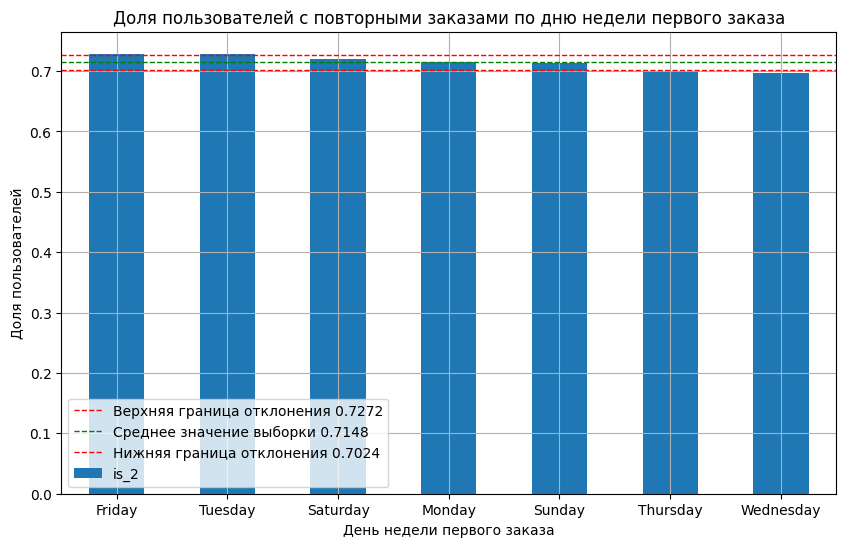

In [106]:
# построим график группировки для лучшего восприятия
round(profile_df.groupby('day_of_week')['is_2'].mean().sort_values(ascending=False), 4).plot(kind='bar',
               title=f'Доля пользователей с повторными заказами по дню недели первого заказа',
               legend=True,
               ylabel='Доля пользователей',
               xlabel='День недели первого заказа',
               rot=0,
               figsize=(10, 6))

share_plus_std = profile_df.groupby('day_of_week')['is_2'].mean().mean() + profile_df.groupby('day_of_week')['is_2'].mean().std()
share_mean = profile_df.groupby('day_of_week')['is_2'].mean().mean()
share_minus_std = profile_df.groupby('day_of_week')['is_2'].mean().mean() - profile_df.groupby('day_of_week')['is_2'].mean().std()

# Наносим на график линии со средним значением доли и границами стандартного отклонения
# Будет использовать эти линии для ответа на поставленный вопрос

plt.axhline(share_plus_std,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Верхняя граница отклонения {round(share_plus_std, 4)}')

plt.axhline(share_mean,
            color='green',
            linestyle='--',
            linewidth=1,
            label=f'Среднее значение выборки {round(share_mean, 4)}')

plt.axhline(share_minus_std,
            color='red', 
            linestyle='--',
            linewidth=1,
            label=f'Нижняя граница отклонения {round(share_minus_std, 4)}')
plt.grid()
plt.legend()

plt.show()

**Ответ на вопрос**

- Можно заключить, что да, день недели первого заказа влияет на вероятность возврата клиента.
- Так, больше всего вероятность вернуться у клиентов, которые совершили первый заказ во `вторник` (`72.81%`) и `пятницу` (`72.88%`).
- Меньше всего такая вероятность у клиентов, совершивших первый заказ в `среду` (`69.72%`) и `четверг` (`70.04%`).
- Разброс значений невелик, но на графике заметно, что значения для `вторника` и `пятницы` выходят за вернхюю границу стандартного отклонения, а для `среды` и `четверга` - за нижнюю. Это указывает на значимые для исследования отклонения.

[Содержимое проекта](#Содержимое-проекта)

---

#### **Задача - интервал между заказами и удержание клиентов** 

[Содержимое проекта](#Содержимое-проекта)

Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [107]:
# Рассчитаем и сразу отразим искомые значения интервала между заказами
print(f'Среднее время между заказами для пользователей, совершивших 2 - 4 заказа: '
      f'{round(profile_df[(profile_df["is_2"] == 1) & (profile_df["is_5"] == 0)]["avg_days_since_prev"].mean(), 2)} дней')

print(f'Среднее время между заказами для пользователей, совершивших 5+ заказов: '
      f'{round(profile_df[profile_df["is_5"] == 1]["avg_days_since_prev"].mean(), 2)} дней')


Среднее время между заказами для пользователей, совершивших 2 - 4 заказа: 10.02 дней
Среднее время между заказами для пользователей, совершивших 5+ заказов: 7.44 дней


**Ответ на вопрос**

Можно заключить, что чем короче интервал между заказами, тем выше вероятность повторного заказа.

#### **Задача - лайфтайм клиентов** 

[Содержимое проекта](#Содержимое-проекта)

Условия задачи прямо не указывают создать такой столбец, но мы сделаем его с целью использования при построении матрицы корреляции.

In [108]:
profile_df['user_lifetime_days'] = (profile_df['last_order_dt'] - profile_df['first_order_dt']).dt.days
display(profile_df.head(10))

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\2348833579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_df['user_lifetime_days'] = (profile_df['last_order_dt'] - profile_df['first_order_dt']).dt.days


,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_since_prev,is_2,is_5,tickets_group,day_of_week,user_lifetime_days
0,000898990054619,2024-10-23,2024-10-23,mobile,Лугоградская область,Облачко,концерты,1,902.739990,3.000000,19.000000,0,0,2-3 билета,Wednesday,0
1,000a55a418c128c,2024-10-15,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,1,74.839996,2.000000,16.000000,0,0,1-2 билета,Tuesday,0
2,000cf0659a9f40f,2024-06-20,2024-06-21,mobile,Широковская область,Лови билет!,концерты,12,1155.300049,3.250000,0.083333,1,1,3-5 билетов,Thursday,1
3,00147c9209d45d3,2024-06-25,2024-06-25,mobile,Каменевский регион,Облачко,концерты,1,235.300003,1.000000,0.000000,0,0,1-2 билета,Tuesday,0
4,001e7037d013f0f,2024-09-29,2024-09-29,mobile,Каменевский регион,Край билетов,театр,1,193.750000,1.000000,13.000000,0,0,1-2 билета,Sunday,0
5,0020c5654c92ec1,2024-07-02,2024-07-02,mobile,Каменевский регион,Билеты без проблем,концерты,1,193.419998,2.000000,0.000000,0,0,1-2 билета,Tuesday,0
6,00245c702bc343e,2024-09-25,2024-10-25,mobile,Яблоневская область,Билеты без проблем,театр,2,255.729996,3.500000,27.500000,1,0,3-5 билетов,Wednesday,30
7,0028d17a676f8c8,2024-10-06,2024-10-06,mobile,Каменевский регион,Мой билет,концерты,1,142.789993,1.000000,29.000000,0,0,1-2 билета,Sunday,0
8,002b75ca606ba46,2024-07-31,2024-10-16,mobile,Каменевский регион,Мой билет,концерты,5,380.891998,2.800000,20.000000,1,1,2-3 билета,Wednesday,77
9,002ec276eee9b0b,2024-07-21,2024-10-31,mobile,Каменевский регион,Дом культуры,концерты,21,788.461853,2.857143,5.380952,1,1,2-3 билета,Sunday,102


In [109]:
# Отразим статистические показатели для информации
profile_df['user_lifetime_days'].describe()

count    12261.000000
mean        37.789821
std         48.156706
min          0.000000
25%          0.000000
50%          8.000000
75%         75.000000
max        152.000000
Name: user_lifetime_days, dtype: float64

---

### Корреляционный анализ количества покупок и признаков пользователя

[Содержимое проекта](#Содержимое-проекта)

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

#### **Задача - корреляционный анализ числа заказов** 

[Содержимое проекта](#Содержимое-проекта)

Проведите корреляционный анализ:

- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

При построении корреляционной матрицы некоторые столбцы исключим из расчетов:
- Столбцы `first_order_dt` и `last_order_dt` не имеет смысла брать для построения матрицы, т.к. это просто временные метки, фиксирующие события из поведения пользователя. Это "жесткие", зафиксированные данные, которые с течением времени изменяться не будут. А вот столбец `user_lifetime_days` как агрегированный показатель уже будет иметь ценность, т.к. он описывает поведение пользователя.
- Столбцы `is_2` и `is_5` также не имеет смысла брать для анализа, т.к., во-первых, это бинарные признаки, с которыми будет проблематично построить корректную корреляционную связь. Во-вторых, эти признаки сами по себе уже указывают на количество заказов, и построение связи между столбцом `total_orders` и этими признаками будет в некотором смысле самовоспроизведением. То есть матрица очевидно покажет сильную связь с этими признаками.

In [110]:
# Вычисляем корреляционную матрицу по заданным столбцам
interval_cols = ['total_orders', 'avg_revenue_rub', 'avg_tickets_count', 'avg_days_since_prev']
correlation_matrix = profile_df[['first_device','first_region','first_service','first_event','total_orders','avg_revenue_rub','avg_tickets_count','avg_days_since_prev','tickets_group','day_of_week','user_lifetime_days']].phik_matrix(interval_cols=interval_cols)

# Выводим результат
# Условие, заданное в параметре loc, помогает убрать строгу с индексом total_orders
# Так мы уберем строку, которая будет иметь индекс корреляции 1
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)

Корреляционная матрица с коэффициентом phi_k для переменной rating


,total_orders
user_lifetime_days,0.689159
avg_days_since_prev,0.470469
avg_tickets_count,0.370889
tickets_group,0.277805
avg_revenue_rub,0.254055
first_service,0.079706
first_event,0.036356
day_of_week,0.032064
first_device,0.008147
first_region,0.000000


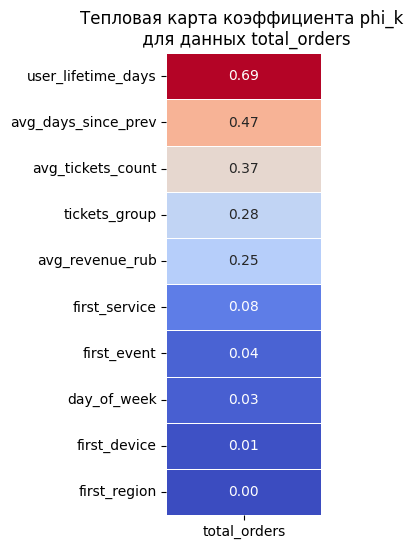

In [111]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции в переменную, для удобства
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5,
            cbar=False
           )
plt.yticks(rotation=0) 
plt.title('Тепловая карта коэффициента phi_k \n для данных total_orders')

# Выводим график
plt.show()

Теперь воспользуемся рекомендацией из условий задачи.

На текущий момент видно, что более сильные связи установлены с числовыми значениями, а также с одной категориальной группой - `tickets_group`. С остальными столбцами связь практически отсутствует.

Если посмотреть на распределение данных в столбце `total_orders`, то станет заметно, что половина значений находится в диапазоне от `1` до `3` заказов. Представляется обоснованным предположение, что матрица действительно не может корректно выстроить связь из-за этого.

In [112]:
display(profile_df['total_orders'].describe())

count    12261.000000
mean         6.429818
std          8.885647
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         54.000000
Name: total_orders, dtype: float64

C:\Users\cyrus\AppData\Local\Temp\ipykernel_24308\417904348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_df['orders_segment'] = pd.cut(profile_df['total_orders'], bins=bins, labels=labels)


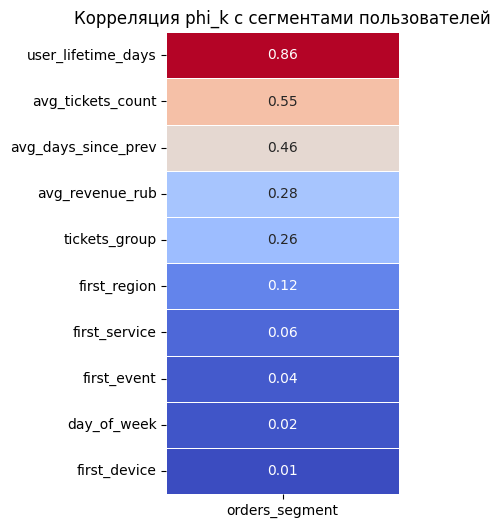

In [113]:
# Зададим бины и названия для будущей сегментации данных в столбце
bins = [0, 1, 4, profile_df['total_orders'].max()]
labels = ['1 заказ', '2–4 заказа', '5+ заказов']

#
profile_df['orders_segment'] = pd.cut(profile_df['total_orders'], bins=bins, labels=labels)
interval_cols_segmented = ['avg_revenue_rub', 'avg_tickets_count', 'avg_days_since_prev']
correlation_matrix_segmented = profile_df[['first_device','first_region','first_service','first_event','avg_revenue_rub','avg_tickets_count','avg_days_since_prev','tickets_group','day_of_week','user_lifetime_days', 'orders_segment']].phik_matrix(interval_cols=interval_cols_segmented)

# Визуализируем корреляции с orders_segment
plt.figure(figsize=(3, 6))
data_heatmap_segmented = (
    correlation_matrix_segmented
    .loc[correlation_matrix_segmented.index != 'orders_segment'][['orders_segment']]
    .sort_values(by='orders_segment', ascending=False)
)
sns.heatmap(data_heatmap_segmented, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar=False)
plt.yticks(rotation=0)
plt.title('Корреляция phi_k с сегментами пользователей')
plt.show()

**Ответ на вопрос**

По итогам построения двух матриц заметно, что сильную связь - `0.86` - с количеством заказов имеет лайфтайм пользователя (`user_lifetime_days`). Еще два признака имеют среднюю по силе связь - это `avg_tickets_count` (`0.55`) и `avg_days_since_prev` (`0.46`).

Попробуем дополнительно построить матрицу корреляции Спирмана для столбца `total_orders`, чтобы проверить направление связи.

In [114]:
corr_spearman = profile_df[['total_orders', 'avg_revenue_rub', 'avg_tickets_count', 'avg_days_since_prev', 'user_lifetime_days']].corr(method='spearman')
display(corr_spearman['total_orders'].sort_values(ascending=False))

total_orders           1.000000
user_lifetime_days     0.820588
avg_days_since_prev    0.125231
avg_revenue_rub        0.087824
avg_tickets_count      0.028237
Name: total_orders, dtype: float64

Как видим, матрица корреляции Спирмана показала такой же убывающий порядок связи между количеством заказов и анализируемыми признаками (столбцы расположены в том же порядке).

При этом наблюдается такое же сильное значение для столбца `user_lifetime_days` - `0.82`. Это указывает на сильную положительную монотонную зависимость. Чем выше лайфтайм пользователя, тем больше заказов он совершает.

Для остальных столбцов видна слабая (почти отсутствующая) положительная монотонная связь.

При этом разница в значениях связи между матрицей `Phi_k` и матрицей `Спирмана` не является проблемой, т.к. это следствие самих методов расчета корреляции. Метод Спирмана позволяет увидеть только монотонные зависимости, тогда как Phi_k видит любые формы зависимости, в том числе в неравномерно распределенных данных.

[Содержимое проекта](#Содержимое-проекта)

## Общий вывод и рекомендации

[Содержимое проекта](#Содержимое-проекта)

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

### Информация об операциях с данными

[Содержимое проекта](#Содержимое-проекта)

1. Первоначально полученный датасет `df` имел `290 611` строк и `15` столбцов.
2. Пропуски были только в столбце `days_since_prev` - 21 933 строк или 7.5% от общего кол-ва строк. Наличие пропусков - это ожидаемый результат, т.к. этот столбец создан по результатам выполнения SQL-запроса, а пропуски обозначают пользователей без повторных заказов. Поэтому решено оставить пропуски как есть.
3. В датасете был создан новый столбей `revenue_rub`, в котором все значения выручки указаны в рублях: сконвертированы из тенге или перенесены из оригинального столбца `revenue`.
4. Были оптимизированы типы данных в столбцах `order_id`, `tickets_count`, `event_id`, `revenue` и `revenue_rub`.
5. Установлено, что все данные записаны корректно, не имеют дубликатов и не требуют нормализации.
6. При изучении столбцов `tickets_count`, `days_since_prev` и `revenue_rub` выявлены аномальные значения (выбросы), которые решено отфильтровать по 99 перцентилю. Фильтрация последовательно выполнена по трем указанным столбцам.
7. По итогам фильтрации получен датасет, из которого удалено `27 328` строк или `9%` от их исходного количества. Итого в отфильтрованном датасете имелось `263 283` строк и `16` столбцов.
8. На основе отфильтрованного датасета создан датасет с профилем пользователей - в него вошли агрегированные данные для каждого пользователя. Получен датасет `profile_df_default` с `12 905` строками и `11` столбцами.
9. В датасете `profile_df_default` созданы два столбца с бинарными признаками (`0` или `1`): `is_2` и `is_5`. Они обозначают пользователей, совершивших `2 и более заказов` и `5 и более заказов` соответственно.
10. Установлено, что в столбце `total_orders` датасета `profile_df_default` основные значения сгруппированы в диапазоне от 1 до 18 заказов на пользователя, но присутствует явно аномальное значение в 10 188 заказов у одного пользователя. Поэтому решено отфильтровать данные в столбце `total_orders` по 95-перцентилю.
11. По итогам фильтрации создан датасет `profile_df` с `12 261` строками и `13` столбцами. На его основе решались исследовательские задачи. Удалено (отфильтровано) `644` строки или `5%` от исходных строк.
12. В ходе решения исследовательских задач создано два дополнительных столбца: `orders_segment` и `user_lifetime_days`.

Итоговый датасет `profile_df` имеет `12 261` строк и `15` столбцов со следующим описанием:
- `user_id` - уникальный идентификатор пользователя
- `first_order_dt` - дата первого заказа пользователя
- `last_order_dt` - дата последнего заказа пользователя
- `first_device` - тип устройства, с которого совершен первый заказ пользователя
- `first_region` - регион, из которого совершен первый заказ пользователя
- `first_service` - билетный оператор, у которого пользователь совершил первый заказ
- `first_event` - тип мероприятия, на которое пользователей впервые купил билет
- `total_orders` - общее количество заказов у пользователя
- `avg_revenue_rub` - средний размер выручки у этого пользователя (в рублях) на заказ
- `avg_tickets_count` - среднее количество билетов в заказе пользователя
- `avg_days_since_prev` - среднее количество дней между повторными заказами пользователя
- `is_2` - бинарный признак, обозначающий совершение повторных заказов пользователем, где `0` - не совершал, `1` - совершал повторные заказы
- `is_5` - бинарный признак, обозначающий, что пользователь совершил 5 и более заказов, где `0` - не совершал, `1` - совершал 5 и более заказов
- `orders_segment` - сегменты пользователей по количеству билетов в заказе
- `user_lifetime_days` - интервал между первым и последним заказом пользователя

### Основные результаты анализа

[Содержимое проекта](#Содержимое-проекта)

**Ответы на поставленные вопросы:**

1. **Сколько пользователей в выборке?** 
    - Общее количество пользователей в датасете `profile_df`: `12 261`


2. **Как распределены пользователи по числу заказов?**
    - Около 50% пользователей приходится всего на 1 сегмент - `2-3 билета`.
    - Еще в двух сегментах находится примерно одинаковое количество пользователей (~ по `25%`): 
        - `3 186` пользователей для сегмента `1-2 билета` и 
        - `3 069` пользователей для сегмента `3-5 билетов`
    - Сегмент `более 5 билетов` имеет всего `92` пользователя.


3. **Какие ещё статистические показатели вы посчитали важными во время изучения данных?**
    - Средняя выручка с одного заказа: `548.81` руб.
    - Доля пользователей, совершивших `2 и более заказа`: `0.71`
    - Доля пользователей, совершивших `5 и более заказов`: `0.37`
    - Больше всего пользователей совершает первый заказ при покупке билетов на `концерты` (`43%` пользователей);
    - Больше всего пользователей совершает первый заказ с `мобильного телефона` (`82%` пользователей);
    - Больше всего пользователей совершает первый заказ из `Каменевского региона` (`33%` пользователей);
    - Больше всего пользователей совершает первый заказ через оператора `Билеты без проблем` (`22%` пользователей).


4. **Какие признаки первого заказа связаны с возвратом пользователей?**
    - Установлено, что в целом доля пользователей, совершивших повторный заказ, примерно одинакова для всех сегментов и по всем признаками (тип мероприятия, тип устройства, регион заказа и оператор заказа).
    - В частности, тип мероприятия первого заказа не влияет на совершение повторных заказов. Пользователи, купившие первый билет на концерт, чаще совершают повторный заказ, чем пользователи, купившие первый билет на спортивное мероприятие. Но эта разница незначительна.
    

5. **Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?**
    - Пользователи, имеющие повторные заказы, в целом приносят более высокую среднюю выручку с заказа, чем пользователи, сделавшие только один заказ.
    - Пользователи, совершающие 5 и более заказов, в целом приносят более высокую среднюю выручку с заказа, чем пользователи, сделавшие 2-4 заказа.
    - Cамый многочисленный сегмент `2-3 билета` обладает также и самой высокой долей пользователей с повторными заказами - `82%` из пользователей совершают заказы вновь. 
    - Сегмент `3-5 билетов` также демонстрирует высокое значение пользователей с повторными заказами (`74%`). В двух других сегментах доля возвращающихся пользователей существенно ниже (`51%` и `39%`).


6. **Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)**?
    - Больше всего вероятность вернуться у клиентов, которые совершили первый заказ во `вторник` (`72.81%`) и `пятницу` (`72.88%`).
    - Меньше всего такая вероятность у клиентов, совершивших первый заказ в `среду` (`69.72%`) и `четверг` (`70.04%`).
    - Перечисленные значения несильно отличаются друг от друга, но они выходят соответственно за верхнюю и нижнюю границы стандартного отклонения.
    - Чем короче интервал между заказами, тем выше вероятность повторного заказа: 
        - `10.02 дней` для пользователей с `2-4 заказами` и 
        - `7.44 дня` для пользователей с `5 и более заказами`.


7. **Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?**
    - Самую сильную связь - `0.86` - с количеством заказов имеет лайфтайм пользователя (`user_lifetime_days`) (по матрице `phi_k`). 
    - Еще два признака имеют среднюю по силе связь - это `avg_tickets_count` / среднее число билетов в заказе (`0.55`) и `avg_days_since_prev` / среднее количество дней между заказами (`0.46`) (по матрице `phi_k`).
    - Матрица Спирмана дополнительно показала, что количество заказов имеет сильную положительную монотонную связь с `user_lifetime_days` (`0.82`). Чем выше лайфтайм пользователя, тем больше заказов он совершает.

### Рекомендации

[Содержимое проекта](#Содержимое-проекта)

1.	Первая очевидная рекомендация – работать над общим удержанием пользователей (увеличением их лайфтайма). Потенциально, при адекватном соотношении затрат на привлечение и удержание пользователей, такие меры повысят среднюю выручку с одного заказа пользователя и количество заказов. Обычно средняя выручка с заказа ("средний чек") и LTV являются ключевыми показателями для unit-экономики проекта. 


2.	Рекомендуется обратить внимание на удержание пользователей, покупающих по `1-2 билета`. На этот сегмент приходится около `25%` пользователей, но в нем довольно низкая доля возвращающихся пользователей (`51%`). 


3.	Сегмент пользователей, покупающих `5 и более билетов`, имеет мало пользователей и, скорее всего, это организации, использующие частные профили для покупок на платформе. Рекомендуется более детально проанализировать поведение таких пользователей, чтобы определить стратегию взаимодействия с ними. Возможно, таким пользователям будут интересны корпоративные тарифы или иные предложения из b2b сегмента.


4.	Рекомендуется настроить маркетинговую активность в зависимости от дня недели, т.к. очевидно, что пользователи менее активны в начале недели (понедельник) и на выходных. Это логично, т.к. на выходных обычно уже поздно покупать билеты на мероприятия, а в понедельник люди думают об этом меньше обычного.


5.	Рекомендуется более точно составить портрет пользователя. Исходя из типа наиболее популярного мероприятия и наиболее типичного количества билетов, можно предположить, что в ядро аудитории Яндекс Афиши попадают:
    - либо молодые люди, условно 18-25 лет, в компании друзей посещающие мероприятия,
    - либо молодые семейные пары без детей (25-40 лет).
	- Потенциально, с такими пользователями можно попробовать увеличить продажу билетов на `стендапы` или `выставки`


6.	Наконец, рекомендуется рассмотреть возможность более детальной категоризации мероприятий, т.к. категория `другое` занимает существенную долю значений. Это может позволить более тонко анализировать потребительское поведение.


## Финализация проекта и публикация в Git

[Содержимое проекта](#Содержимое-проекта)

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**